# Data extraction and merge
Data sources: drug price, info, NDC (11 units) from medicaid medicare
drug info from FDA with NDC (10)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import all

In [86]:
price= pd.read_csv('NADAC_as_of_2017-06-07.csv',dtype={'NDC': str})

In [ ]:
price.head(20)

In [88]:
price.shape

(24486, 12)

In [ ]:
# medicade data uses 11 unit NDC m FDA uses 10 digits instead, here I did the trick according to this website

price['NDC10']=price['NDC'].apply(lambda x: x[0:5]+x[6:])  #de18.founded=de18.founded.apply(lambda x: x[8:])
price.head(10)

In [198]:
product= pd.read_csv('product.csv')

In [200]:
package=pd.read_csv('package.csv')

In [201]:
package.head(5)
package.shape

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ..."
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ..."
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01)
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...


(220912, 4)

In [53]:
product.shape
package.shape

(114224, 18)

(220912, 4)

In [ ]:

#NADAC_Drug_Cost = pd.read_csv('NADAC__National_Average_Drug_Acquisition_Cost_.csv',low_memory=False)
#NADAC_Comparison = pd.read_csv('NADAC_Comparison.csv',dtype={'NDC':str})
#drug_Revenue = pd.read_csv('State_Drug_Utilization_Data_2016.csv')
#merged1 = pd.merge(NADAC_Drug_Cost,drug_Revenue,how='inner',on='NDC')
#merged1.head()

In [54]:
# merging two FDA files
FDA = pd.merge(package,product,how='inner',on='PRODUCTNDC')
FDA.head()
FDA.shape

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01),0002-1407_14757f9d-f641-4836-acf3-229265588d1d,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN


(223280, 21)

In [55]:
import re
def func(x):                                       # replace the - for ''in column:NDCPACKAGECODE for file FDA
    return re.sub('[-]',"", str(x))
#for i in range(3,6):
#FDA1.NDC = FDA1.NDCPACKAGECODE.apply(func)

In [56]:
FDA['NDC10'] = FDA['NDCPACKAGECODE'].apply(func)

In [57]:
FDA.head()
FDA.shape

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120030
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120050
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01),0002-1407_14757f9d-f641-4836-acf3-229265588d1d,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,0002140701
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143361
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143380


(223280, 22)

In [58]:
FDA.to_csv('FDAcode.csv', index=0)

In [90]:
price.head()
FDA.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,NDC10
0,OLMESARTAN MEDOXOMIL 20 MG TAB,62332013230,3.69212,06/07/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6233213230
1,CETIRIZINE HCL 5 MG TABLET,00378363501,0.05956,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017,0037863501
2,GLIPIZIDE-METFORMIN 2.5-500 MG,00378313201,0.46064,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,0037813201
3,RAMIPRIL 5 MG CAPSULE,68180059001,0.08185,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,6818059001
4,SB COUGH CONTROL DM SYRUP,15127094544,0.01182,05/17/2017,ML,C/I,Y,"1, 5",G,NaN,NaN,06/07/2017,1512794544


,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120030
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120050
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01),0002-1407_14757f9d-f641-4836-acf3-229265588d1d,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,0002140701
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143361
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143380


In [93]:
# merge the price and FDA table

drug = pd.merge(FDA,price,how='inner',on='NDC10')
drug.head()
drug.shape

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_x,NDC10,NDC Description,NDC_y,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_48526b2b-3cef-4d67-8c38-d3e9fca1cf3d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
2,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,Sep-16,0009-3116-01,1 BOTTLE in 1 CARTON (0009-3116-01) > 30 mL i...,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,HUMAN PRESCRIPTION DRUG,Cleocin T,NaN,clindamycin phosphate,SOLUTION,TOPICAL,19800620.0,NaN,NDA,NDA050537,Pharmacia and Upjohn Company LLC,CLINDAMYCIN PHOSPHATE,10,mg/mL,"Decreased Sebaceous Gland Activity [PE],Lincos...",NaN,0009311601,0009311601,PENTOXIFYLLINE ER 400 MG TAB,00093511601,0.17410,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
3,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20030101.0,NaN,NDA,NDA017874,Baxter Healthcare Corporation,SCOPOLAMINE,1,mg/3d,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,1001955301,1001955301,TRANSDERM-SCOP 1.5 MG/3 DAY,10019055301,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017
4,10019-553_9caea3f4-e7e2-4d24-b3b6-5e62f37b3ec8,10019-553,10019-553-01,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,10019-553_b877a694-a1d0-4280-937a-a06820b12a88,HUMAN PRESCRIPTION DRUG,Transderm Scop,NaN,Scopalamine,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20161201.0,NaN,NDA,NDA017874,Baxter Healthcare Corporation,SCOPOLAMINE,1,mg/3d,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,1001955301,1001955301,TRANSDERM-SCOP 1.5 MG/3 DAY,10019055301,20.40381,03/22/2017,EA,C/I,N,"2, 5",B,NaN,NaN,06/07/2017


(13102, 35)

In [94]:
drug.to_csv('drug.csv', index=0)

In [4]:
drug= pd.read_csv('drug.csv')

In [5]:
from matplotlib import pyplot as plt
#import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

(array([  1.30580000e+04,   1.50000000e+01,   5.00000000e+00,
          5.00000000e+00,   9.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

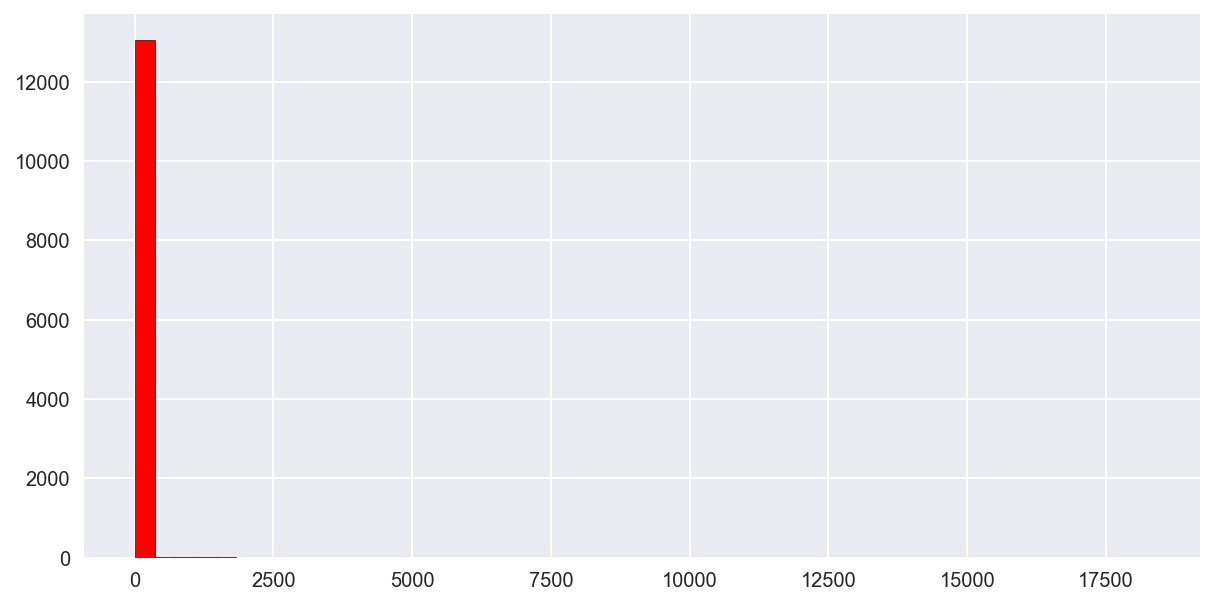

In [7]:
#drug price is super right skewed
plt.figure(figsize=(10,5))
plt.hist((drug.NADAC_Per_Unit),color='red',edgecolor='black',bins=50)

(array([   2.,    2.,    8.,    8.,   31.,   35.,  159.,  296.,  572.,
         546.,  583.,  960.,  903.,  975.,  980.,  785.,  966.,  683.,
         656.,  532.,  570.,  460.,  313.,  358.,  297.,  315.,  266.,
         271.,  142.,  119.,   89.,   51.,   31.,   41.,   11.,   31.,
           4.,    5.,    9.,    8.,    2.,    6.,   11.,    2.,    0.,
           1.,    2.,    3.,    0.,    2.]),
 array([-6.63012354, -6.30124881, -5.97237408, -5.64349935, -5.31462462,
        -4.98574989, -4.65687516, -4.32800043, -3.9991257 , -3.67025097,
        -3.34137624, -3.01250151, -2.68362678, -2.35475205, -2.02587732,
        -1.69700259, -1.36812786, -1.03925312, -0.71037839, -0.38150366,
        -0.05262893,  0.2762458 ,  0.60512053,  0.93399526,  1.26286999,
         1.59174472,  1.92061945,  2.24949418,  2.57836891,  2.90724364,
         3.23611837,  3.5649931 ,  3.89386783,  4.22274256,  4.55161729,
         4.88049202,  5.20936675,  5.53824148,  5.86711622,  6.19599095,
         6.52486

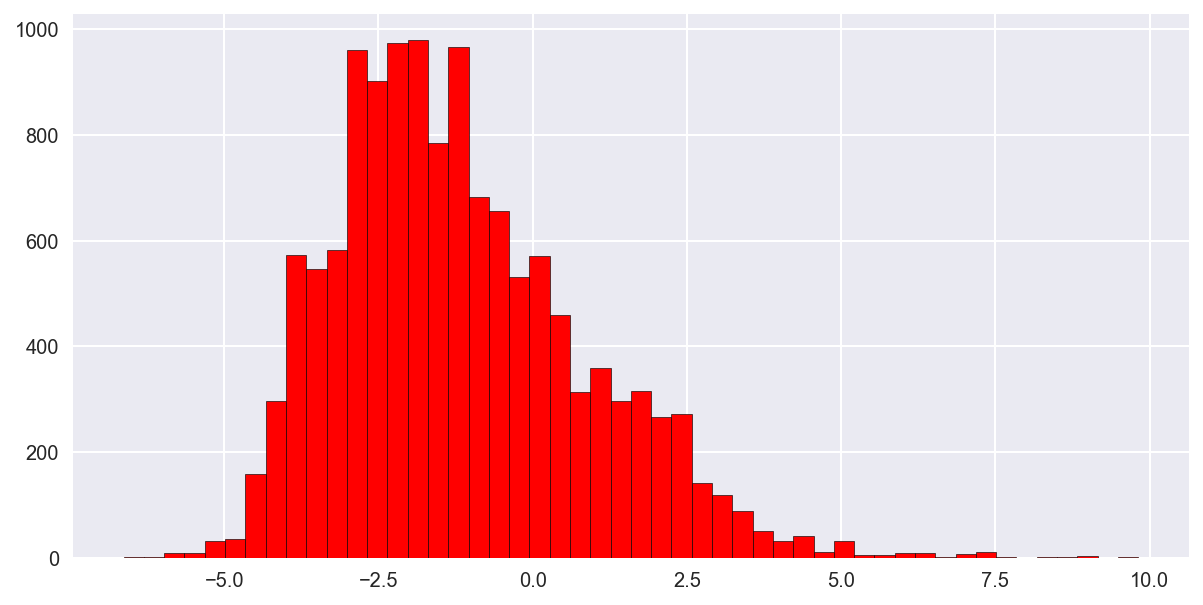

In [6]:
# log unit price looks more normal distribution
plt.figure(figsize=(10,5))
plt.hist(np.log(drug.NADAC_Per_Unit),color='red',edgecolor='black',bins=50)
#plt.xlim(0,100)

interesting features
STARTMARKETINGDATE


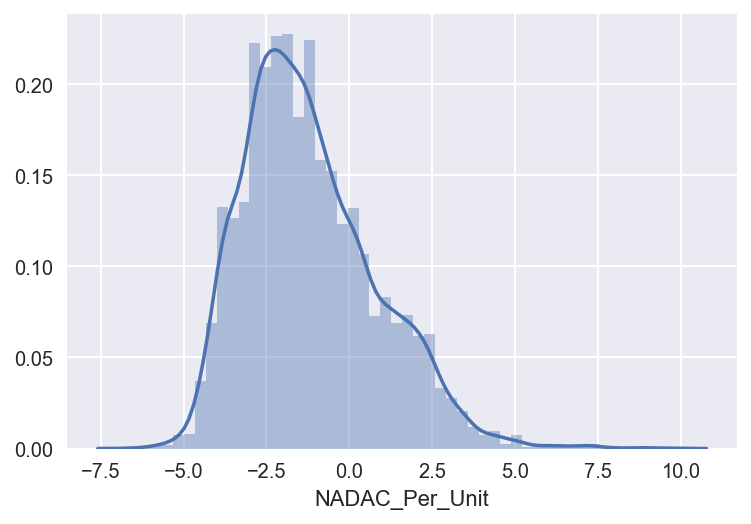

In [8]:
# ditribution plot
sns.distplot(np.log(drug.NADAC_Per_Unit))

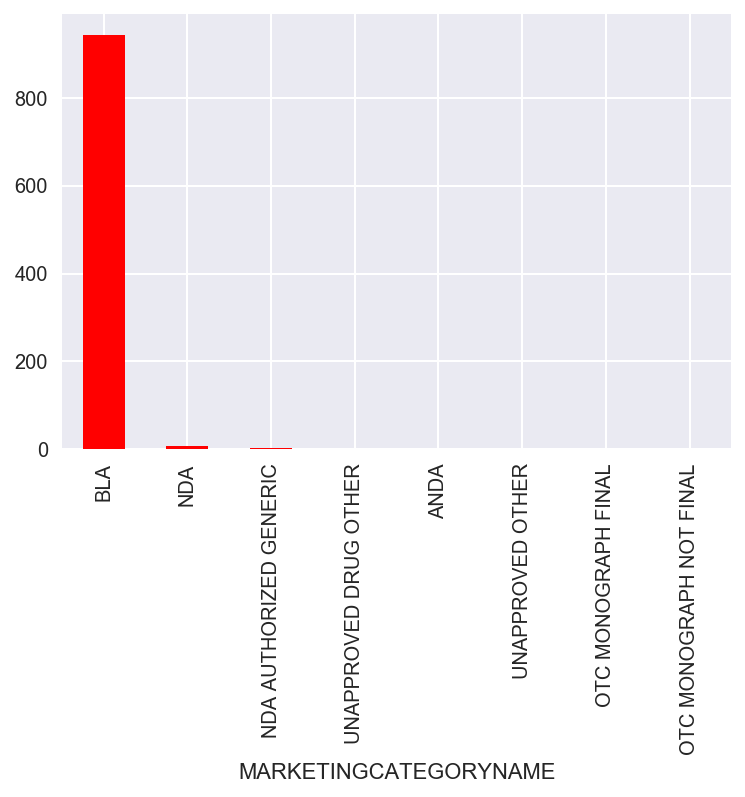

In [13]:
# clearly , BLA drugs are super expensive

drug.groupby('MARKETINGCATEGORYNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='r') # by median

(0, 20)

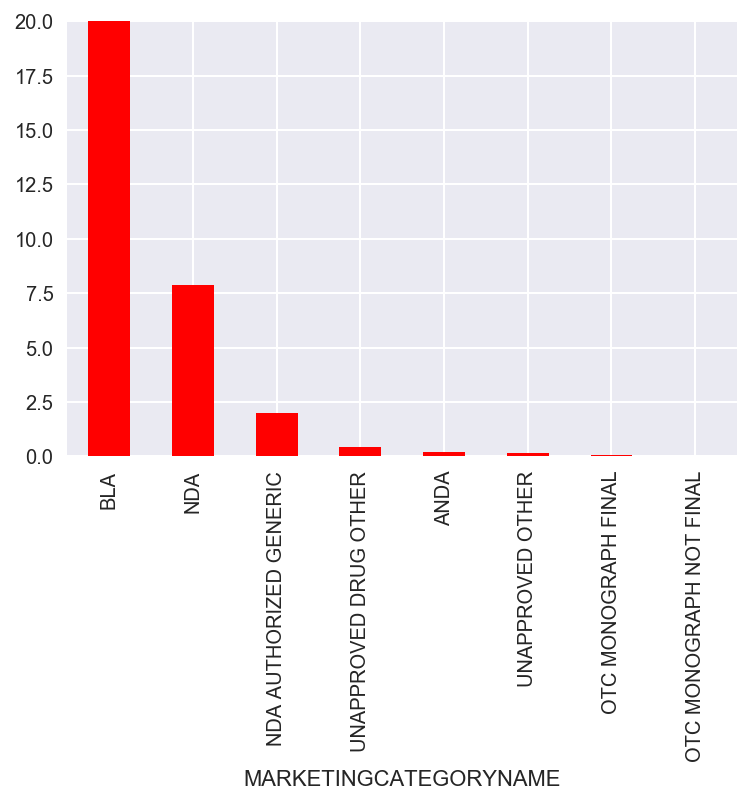

In [15]:
# squeeze the y scale to 20
drug.groupby('MARKETINGCATEGORYNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='r') # by median
plt.ylim(0,20)

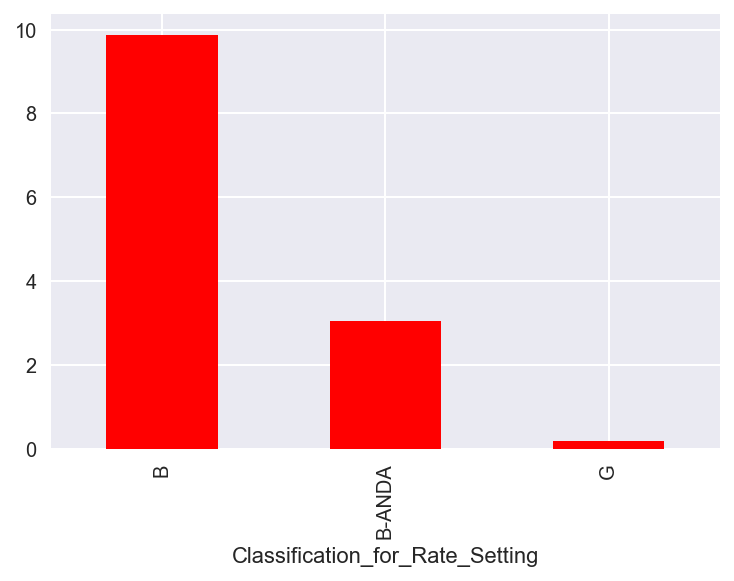

In [14]:
# BRAND VS HALF BRAND VS GENERIC, RESULT IS TOO CLEAR
# inforis kinda redudant with MARKETINGCATEGORYNAME
drug.groupby('Classification_for_Rate_Setting')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='r')



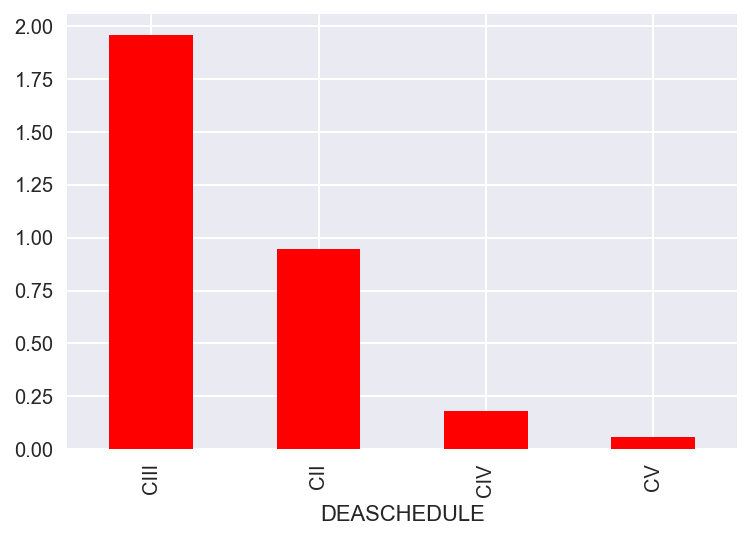

In [10]:
# BY DEA SCHUDEL
drug.groupby('DEASCHEDULE')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='r') # by median


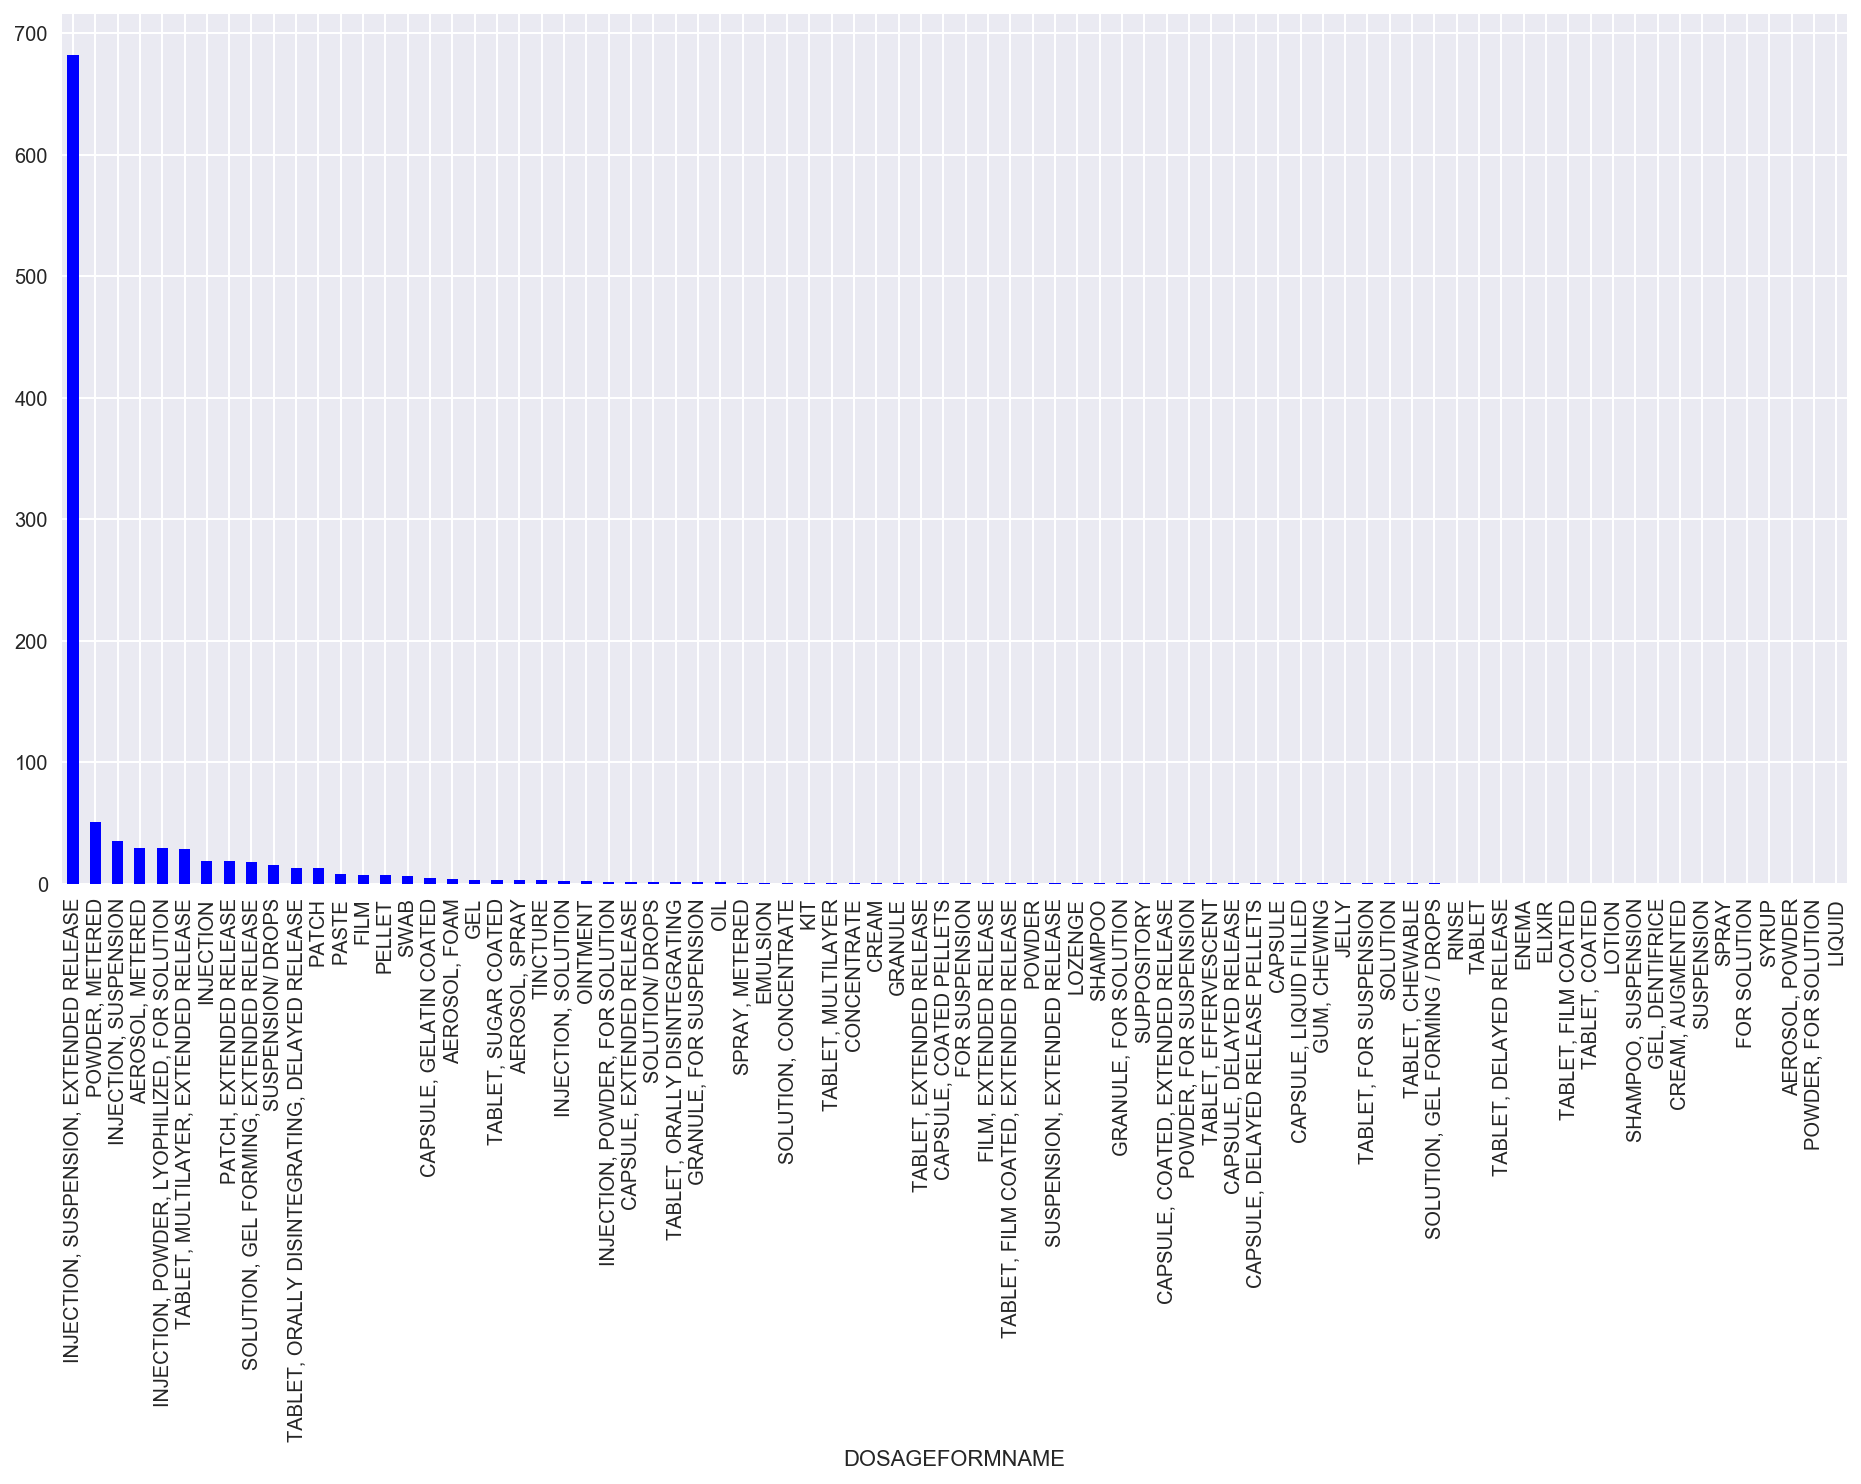

In [17]:
# median price difference by DOSAGEFORMNAME
plt.figure(figsize=(16,8))
drug.groupby('DOSAGEFORMNAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='b')

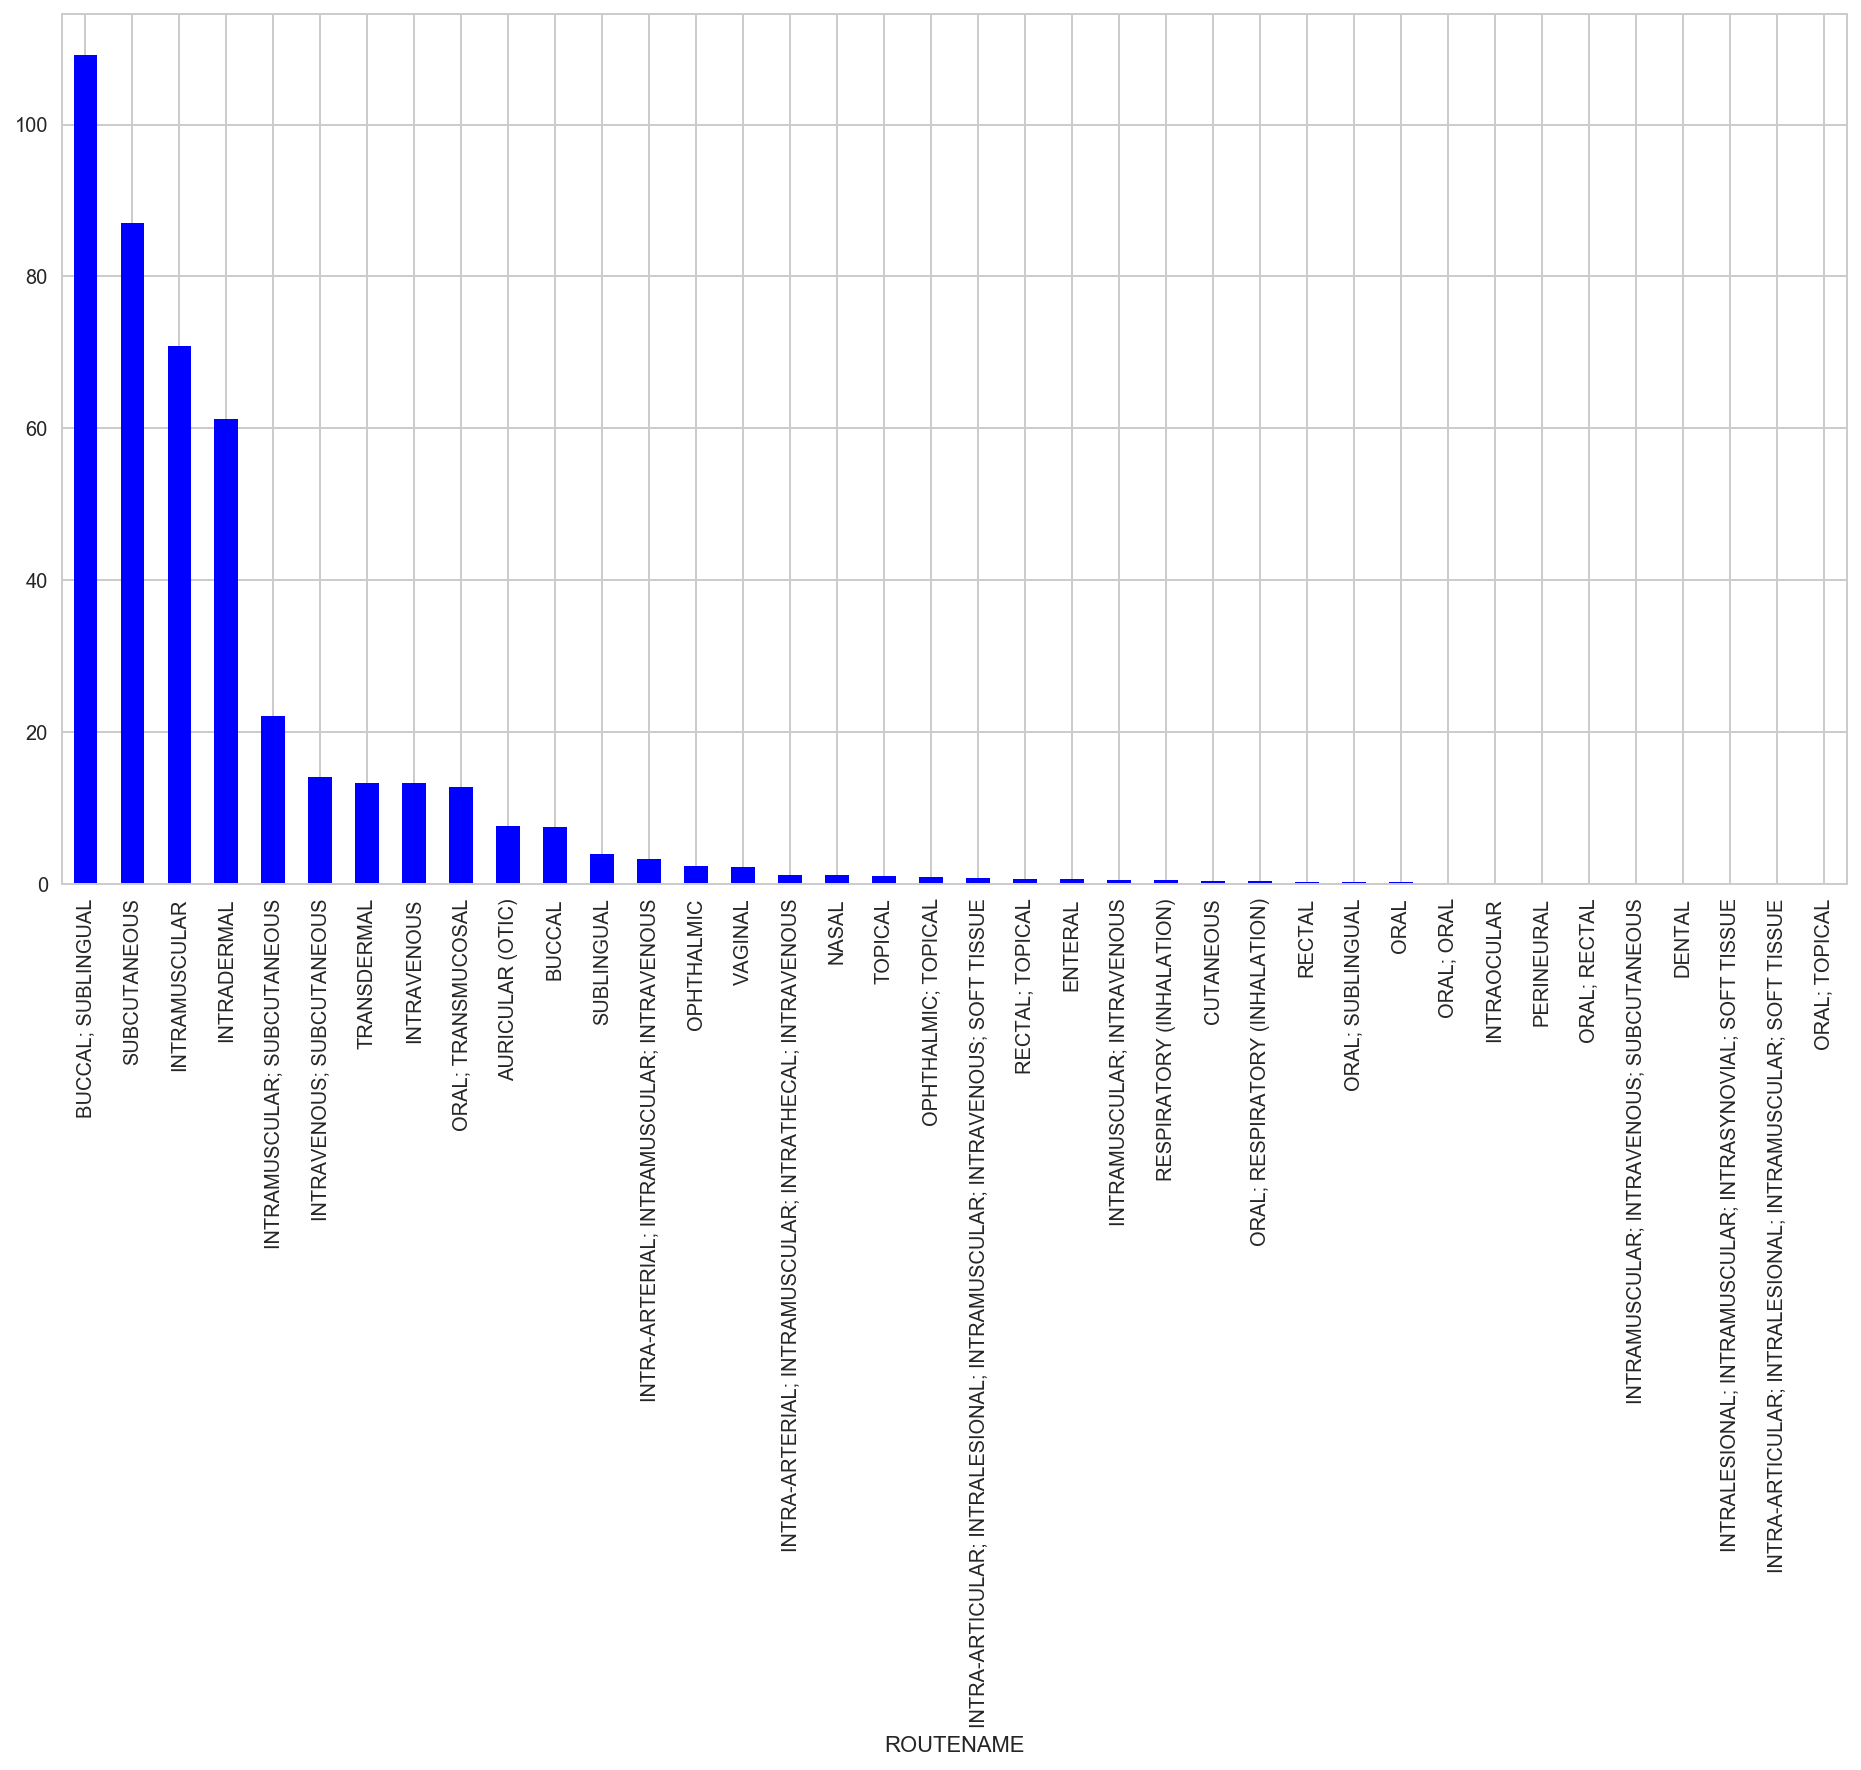

In [316]:
#median price difference by Routename
plt.figure(figsize=(16,8))
drug.groupby('ROUTENAME')['NADAC_Per_Unit'].median().sort_values(ascending=False).plot.bar(color='b')

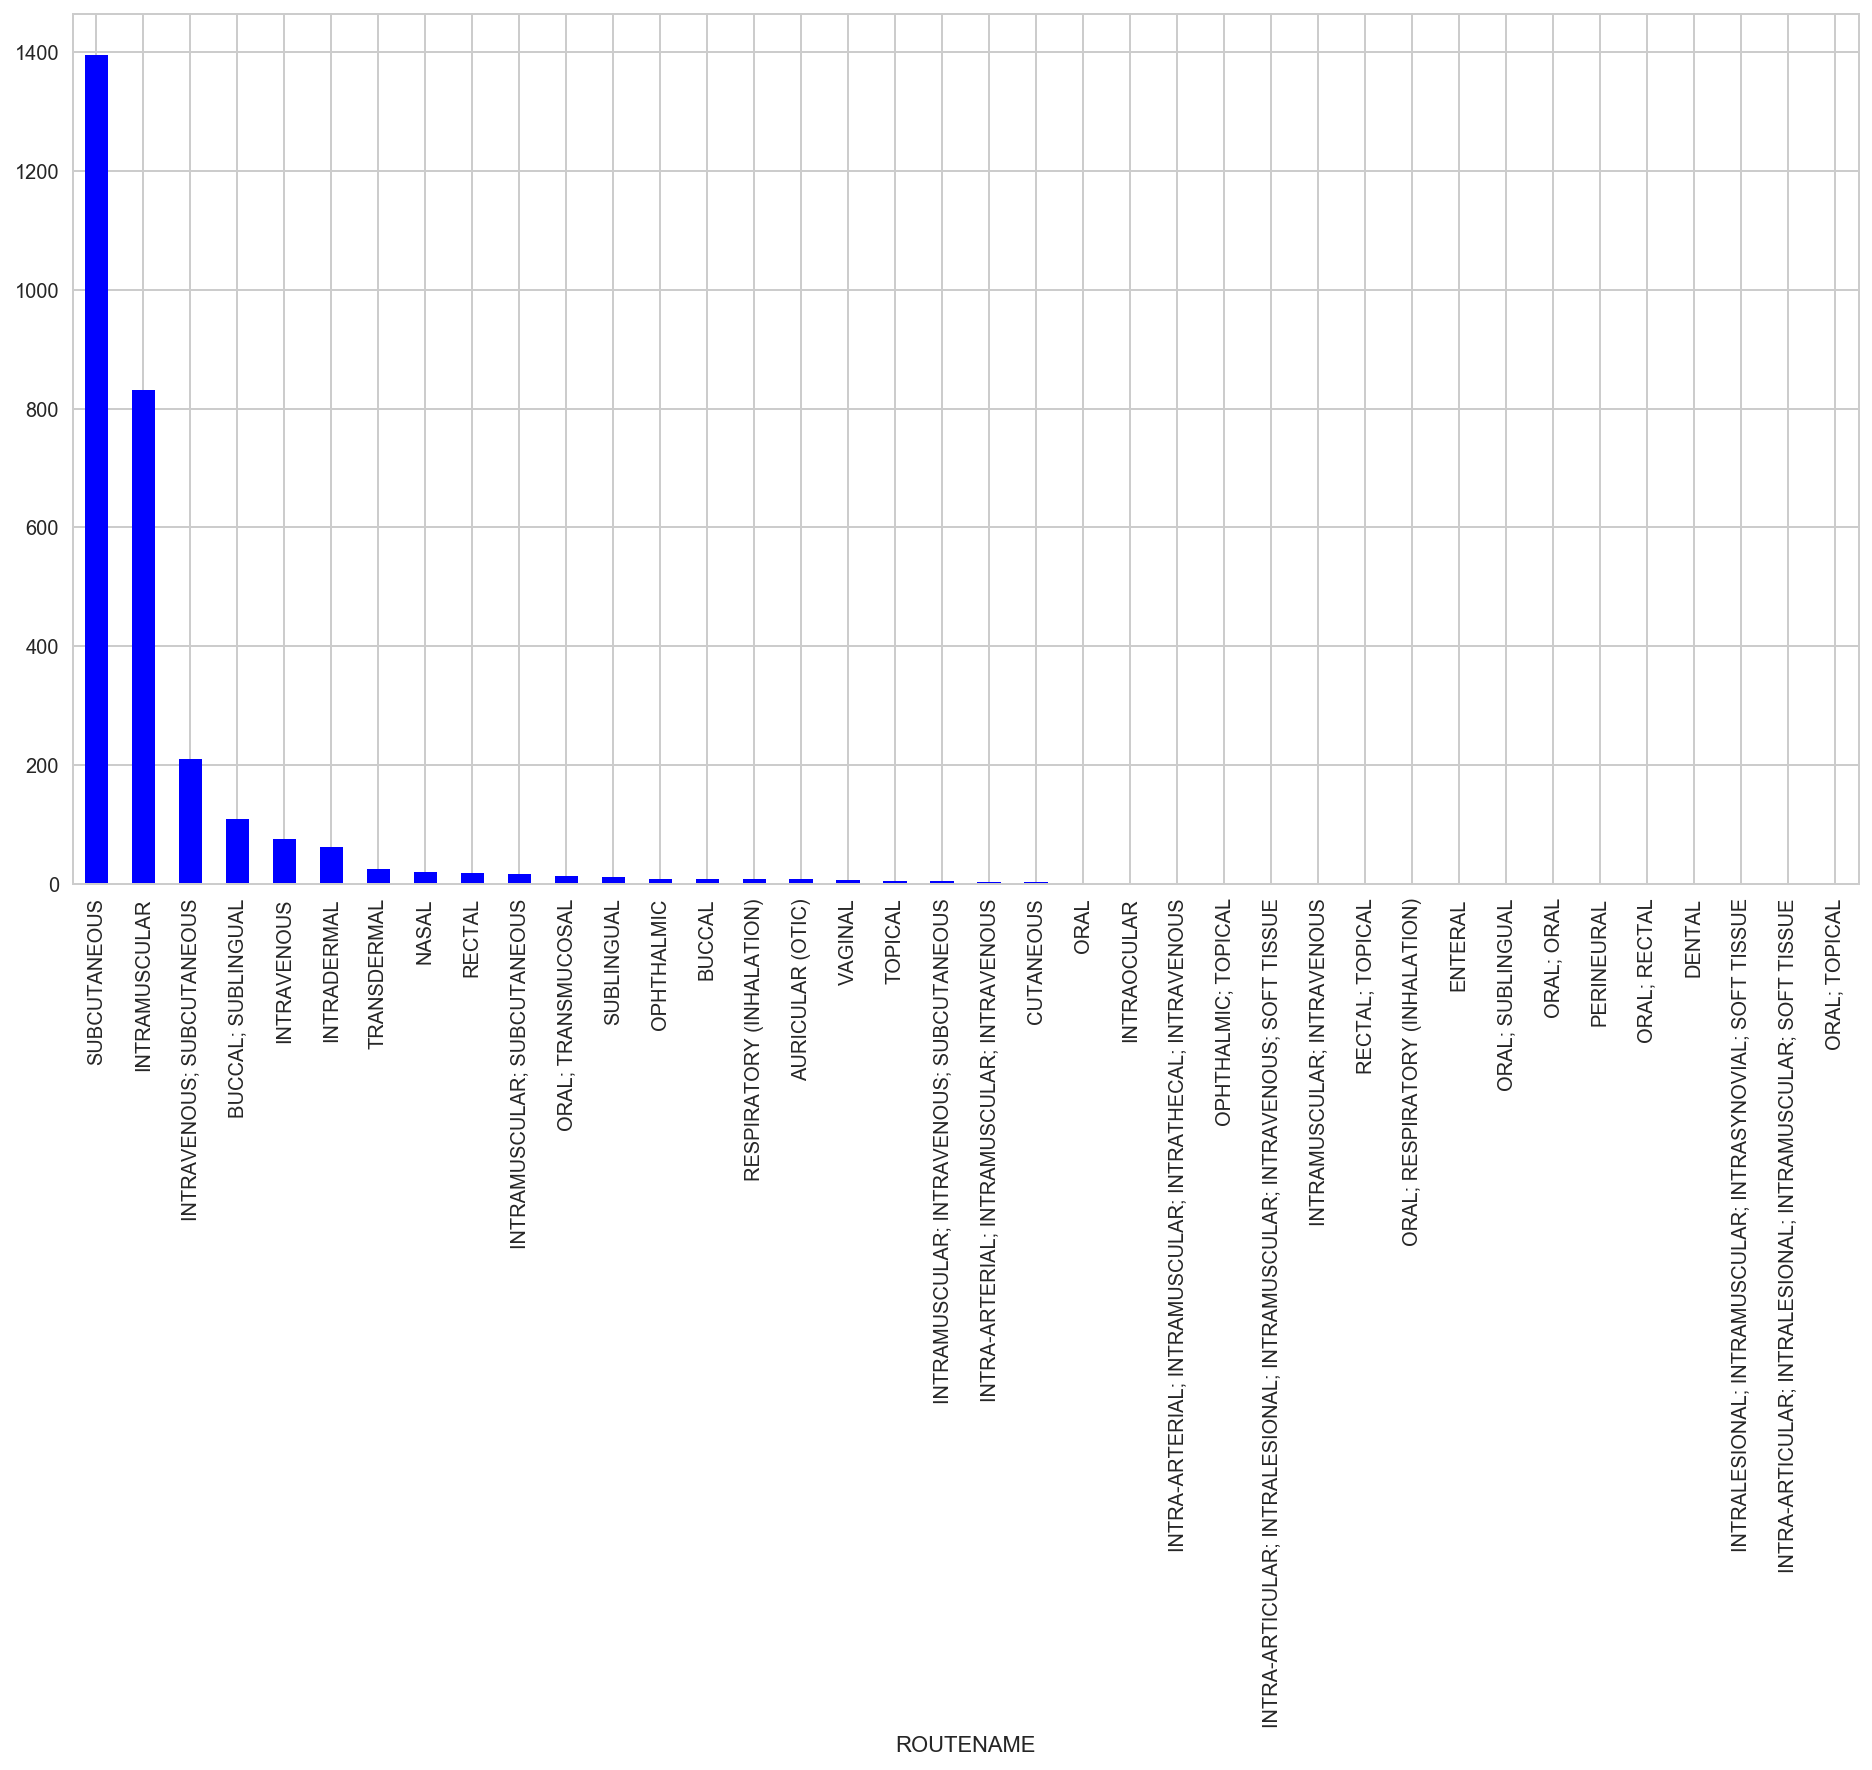

In [317]:
#mean price difference by  routename
plt.figure(figsize=(16,8))

drug.groupby('ROUTENAME')['NADAC_Per_Unit'].mean().sort_values(ascending=False).plot.bar(color='b')

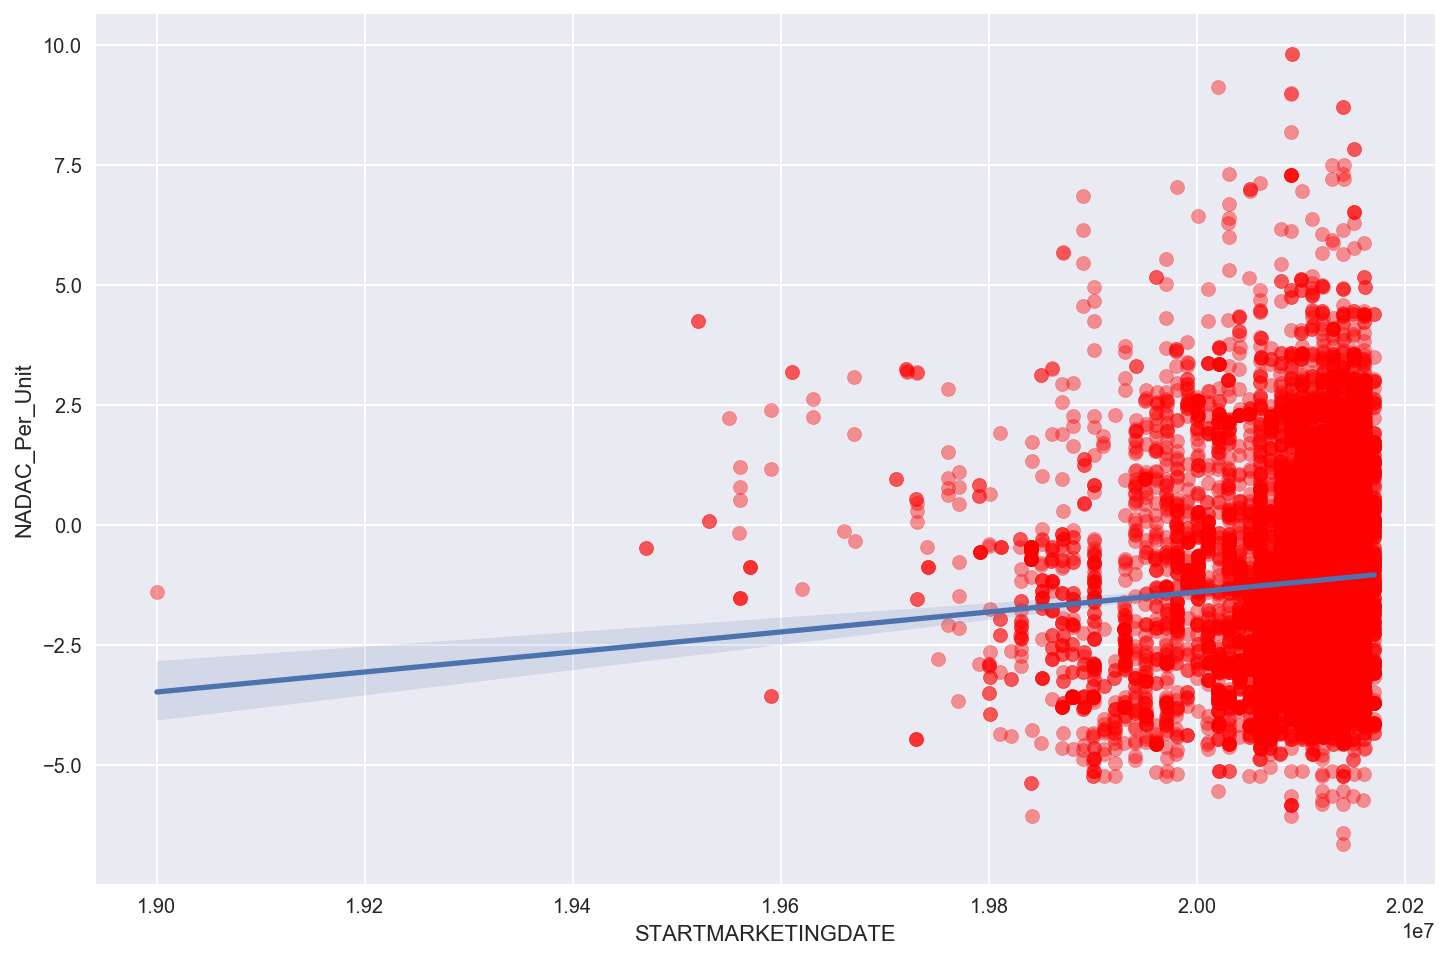

In [18]:
# drug price by time

sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=drug['STARTMARKETINGDATE'], y=np.log(drug['NADAC_Per_Unit']), c='r', alpha=0.4)  #,edgecolor='blue',
#plt.scatter(x=drug['STARTMARKETINGDATE'], y=np.sqrt(drug['NADAC_Per_Unit']), c='r', alpha=0.4)
sns.regplot(x=drug['STARTMARKETINGDATE'], y=np.log(drug['NADAC_Per_Unit']), data=drug, scatter=False, truncate=True)
#ax.set(title='Price prediction by XGboost', xlabel='real price', ylabel='predicted price')

In [62]:
# merging the big file

drug.head(3)
drug.shape
FDA.head(5)
FDA.shape
pricenew.head(5)
pricenew.shape

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC_x,NDC10,NDC Description,NDC_y,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_48526b2b-3cef-4d67-8c38-d3e9fca1cf3d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
2,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,Sep-16,0009-3116-01,1 BOTTLE in 1 CARTON (0009-3116-01) > 30 mL i...,0009-3116_deaa2a92-7be0-4a9a-ae39-6297d868d630,HUMAN PRESCRIPTION DRUG,Cleocin T,NaN,clindamycin phosphate,SOLUTION,TOPICAL,19800620.0,NaN,NDA,NDA050537,Pharmacia and Upjohn Company LLC,CLINDAMYCIN PHOSPHATE,10,mg/mL,"Decreased Sebaceous Gland Activity [PE],Lincos...",NaN,9311601,9311601,PENTOXIFYLLINE ER 400 MG TAB,93511601,0.17410,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017


(13102, 35)

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-30,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-30) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120030
1,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,0002-1200-50,"1 VIAL, MULTI-DOSE in 1 CAN (0002-1200-50) > ...",0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,Florbetapir F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN,0002120050
2,0002-1407_14757f9d-f641-4836-acf3-229265588d1d,0002-1407,0002-1407-01,10 mL in 1 VIAL (0002-1407-01),0002-1407_14757f9d-f641-4836-acf3-229265588d1d,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,Quinidine Gluconate,SOLUTION,INTRAVENOUS,19500712.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN,0002140701
3,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-61,2 SYRINGE in 1 CARTON (0002-1433-61) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143361
4,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,0002-1433-80,4 SYRINGE in 1 CARTON (0002-1433-80) > .5 mL ...,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,Dulaglutide,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN,0002143380


(223280, 22)

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,OLMESARTAN MEDOXOMIL 20 MG TAB,62332013230,3.69212,06/07/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,CETIRIZINE HCL 5 MG TABLET,00378363501,0.05956,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017
2,GLIPIZIDE-METFORMIN 2.5-500 MG,00378313201,0.46064,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
3,RAMIPRIL 5 MG CAPSULE,68180059001,0.08185,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
4,SB COUGH CONTROL DM SYRUP,15127094544,0.01182,05/17/2017,ML,C/I,Y,"1, 5",G,NaN,NaN,06/07/2017


(24486, 12)

In [ ]:
priceall=pd.read_csv('NADAC__National_Average_Drug_Acquisition_Cost_.csv',dtype={'NDC': str})


In [43]:
priceall.tail()
priceall.shape

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
4360864,SB COUGH CONTROL DM SYRUP,15127094544,0.01182,05/17/2017,ML,C/I,Y,"1, 5",G,NaN,NaN,06/07/2017
4360865,RAMIPRIL 5 MG CAPSULE,68180059001,0.08185,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
4360866,GLIPIZIDE-METFORMIN 2.5-500 MG,00378313201,0.46064,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
4360867,CETIRIZINE HCL 5 MG TABLET,00378363501,0.05956,05/17/2017,EA,C/I,Y,1,G,NaN,NaN,06/07/2017
4360868,OLMESARTAN MEDOXOMIL 20 MG TAB,62332013230,3.69212,06/07/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017


(4360869, 12)

In [45]:
priceallcompare=pd.read_csv('NADAC_Comparison.csv',dtype={'NDC': str})




/Users/chrislian/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [46]:
priceallcompare.tail()
priceallcompare.shape

,NDC Description,NDC,Old NADAC Per Unit,New NADAC Per Unit,Classification for Rate Setting,Percent Change,Primary Reason,Start Date,End Date,Effective Date
830906,RAPAMUNE 2 MG TABLET,00008104205,51.29180,54.36931,B,0.06%,WAC Adjustment,05/31/2017,06/07/2017,06/01/2017
830907,TIKOSYN 500 MCG CAPSULE,00069582043,8.31827,9.10351,B,0.09%,WAC Adjustment,05/31/2017,06/07/2017,06/01/2017
830908,LEVOXYL 100 MCG TABLET,60793085410,0.69327,0.75870,B,0.09%,WAC Adjustment,05/31/2017,06/07/2017,06/01/2017
830909,ACCUPRIL 40 MG TABLET,00071053523,3.94500,4.31737,B,0.09%,WAC Adjustment,05/31/2017,06/07/2017,06/01/2017
830910,HORIZANT ER 600 MG TABLET,53451010101,11.30229,12.42121,B,0.10%,WAC Adjustment,05/31/2017,06/07/2017,06/01/2017


(830911, 10)

In [63]:
# medicade data uses 11 unit NDC m FDA uses 10 digits instead, here I did the trick according to this website

priceall['NDC10']=priceall['NDC'].apply(lambda x: x[0:5]+x[6:])  #de18.founded=de18.founded.apply(lambda x: x[8:])
priceall.head(5)

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,NDC10
0,SIMVASTATIN 80 MG TABLET,16714068502,0.08008,03/23/2016,EA,C/I,N,1,G,NaN,NaN,04/13/2016,1671468502
1,CARVEDILOL 12.5 MG TABLET,68382009405,0.03281,03/23/2016,EA,C/I,N,1,G,NaN,NaN,04/13/2016,6838209405
2,CLONAZEPAM 1 MG TABLET,00093083310,0.02619,03/23/2016,EA,C/I,N,1,G,NaN,NaN,04/13/2016,0009383310
3,NAPHCON-A EYE DROPS,00065008542,0.56743,12/23/2015,ML,C/I,Y,"4, 5, 6",B,NaN,NaN,04/13/2016,0006508542
4,OFLOXACIN 0.3% EAR DROPS,24208041005,17.27867,02/17/2016,ML,C/I,N,"4, 5",G,NaN,NaN,04/13/2016,2420841005


In [65]:
drugall = pd.merge(FDA,priceall,how='inner',on='NDC10')
drugall.head()
drugall.shape

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.03178,03/23/2016,EA,C/I,N,1,G,NaN,NaN,04/13/2016
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.03062,04/20/2016,EA,C/I,N,1,G,NaN,NaN,04/20/2016
2,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.03062,04/20/2016,EA,C/I,N,1,G,NaN,NaN,04/27/2016
3,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.03062,04/20/2016,EA,C/I,N,1,G,NaN,NaN,05/04/2016
4,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,00093007301,0.03062,04/20/2016,EA,C/I,N,1,G,NaN,NaN,05/11/2016


(1543295, 34)

In [66]:
drugall.to_csv('drugall.csv',index=0)

In [72]:
drugall[drugall['NDC']=='00093007301'].shape

drugall[drugall['NDC']=='68180027709'].shape

(370, 34)

(125, 34)

In [71]:
drugall.tail()

,PRODUCTID_x,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTID_y,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
1543290,68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,68180-277,68180-277-09,90 TABLET in 1 BOTTLE (68180-277-09),68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,HUMAN PRESCRIPTION DRUG,Valsartan,NaN,Valsartan,TABLET,ORAL,20150105.0,NaN,ANDA,ANDA201677,"Lupin Pharmaceuticals, Inc.",VALSARTAN,80,mg/1,"Angiotensin 2 Receptor Antagonists [MoA],Angio...",NaN,6818027709,VALSARTAN 80 MG TABLET,68180027709,0.11886,04/19/2017,EA,C/I,N,1,G,NaN,NaN,05/10/2017
1543291,68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,68180-277,68180-277-09,90 TABLET in 1 BOTTLE (68180-277-09),68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,HUMAN PRESCRIPTION DRUG,Valsartan,NaN,Valsartan,TABLET,ORAL,20150105.0,NaN,ANDA,ANDA201677,"Lupin Pharmaceuticals, Inc.",VALSARTAN,80,mg/1,"Angiotensin 2 Receptor Antagonists [MoA],Angio...",NaN,6818027709,VALSARTAN 80 MG TABLET,68180027709,0.10710,05/17/2017,EA,C/I,N,1,G,NaN,NaN,05/17/2017
1543292,68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,68180-277,68180-277-09,90 TABLET in 1 BOTTLE (68180-277-09),68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,HUMAN PRESCRIPTION DRUG,Valsartan,NaN,Valsartan,TABLET,ORAL,20150105.0,NaN,ANDA,ANDA201677,"Lupin Pharmaceuticals, Inc.",VALSARTAN,80,mg/1,"Angiotensin 2 Receptor Antagonists [MoA],Angio...",NaN,6818027709,VALSARTAN 80 MG TABLET,68180027709,0.10710,05/17/2017,EA,C/I,N,1,G,NaN,NaN,05/24/2017
1543293,68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,68180-277,68180-277-09,90 TABLET in 1 BOTTLE (68180-277-09),68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,HUMAN PRESCRIPTION DRUG,Valsartan,NaN,Valsartan,TABLET,ORAL,20150105.0,NaN,ANDA,ANDA201677,"Lupin Pharmaceuticals, Inc.",VALSARTAN,80,mg/1,"Angiotensin 2 Receptor Antagonists [MoA],Angio...",NaN,6818027709,VALSARTAN 80 MG TABLET,68180027709,0.10710,05/17/2017,EA,C/I,N,1,G,NaN,NaN,05/31/2017
1543294,68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,68180-277,68180-277-09,90 TABLET in 1 BOTTLE (68180-277-09),68180-277_65f5d6e7-c7c6-42dc-bd73-b32251c02651,HUMAN PRESCRIPTION DRUG,Valsartan,NaN,Valsartan,TABLET,ORAL,20150105.0,NaN,ANDA,ANDA201677,"Lupin Pharmaceuticals, Inc.",VALSARTAN,80,mg/1,"Angiotensin 2 Receptor Antagonists [MoA],Angio...",NaN,6818027709,VALSARTAN 80 MG TABLET,68180027709,0.10710,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017


# working on the drug file

In [19]:
drug= pd.read_csv('drug.csv',dtype={'PRODUCTNDC':str,'NDC10':str,'NDC_x':str,'NDC_y':str})

In [20]:
drug.rename(columns={'PRODUCTID_x': 'PRODUCTID',}, inplace=True)

In [ ]:
drug.drop('NDC_x', axis=1, inplace=True)

In [22]:
drug.columns

Index([u'PRODUCTID', u'PRODUCTNDC', u'NDCPACKAGECODE', u'PACKAGEDESCRIPTION',
       u'PRODUCTTYPENAME', u'PROPRIETARYNAME', u'PROPRIETARYNAMESUFFIX',
       u'NONPROPRIETARYNAME', u'DOSAGEFORMNAME', u'ROUTENAME',
       u'STARTMARKETINGDATE', u'ENDMARKETINGDATE', u'MARKETINGCATEGORYNAME',
       u'APPLICATIONNUMBER', u'LABELERNAME', u'SUBSTANCENAME',
       u'ACTIVE_NUMERATOR_STRENGTH', u'ACTIVE_INGRED_UNIT', u'PHARM_CLASSES',
       u'DEASCHEDULE', u'NDC10', u'NDC Description', u'NDC11',
       u'NADAC_Per_Unit', u'Effective_Date', u'Pricing_Unit',
       u'Pharmacy_Type_Indicator', u'OTC', u'Explanation_Code',
       u'Classification_for_Rate_Setting',
       u'Corresponding_Generic_Drug_NADAC_Per_Unit',
       u'Corresponding_Generic_Drug_Effective_Date', u'As of Date'],
      dtype='object')

In [23]:
drug.head(2)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017


In [24]:
drug.shape

(13102, 33)

In [ ]:
drug.drop('PRODUCTID_y', axis=1, inplace=True)

# Looking at features

### Interesting:
:PROPRIETARYNAMESUFFIX,PROPRIETARYNAME,NONPROPRIETARYNAME(can make price order), DOSAGEFORMNAME(feature engineering),, ROUTENAME(take first one),STARTMARKETINGDATE(make take out) APPLICATIONNUMBER(do not need to use get rid of other) LABELERNAME(study company)  MARKETINGCATEGORYNAME( get rid of the last others)
PHARM_CLASSES feature engineering(NAS), DEASCHEDULE(figue out differnece),Pricing_Unit(figure out),Pharmacy_Type_Indicator(ALL DRUGS) Explanation_Code(FIGURE OUT),Classification_for_Rate_Setting
Corresponding_Generic_Drug_NADAC_Per_Unit(figure out),Corresponding_Generic_Drug_NADAC_Per_Unit(figure out)


PRODUCTTYPENAME and OTC redundant using otc instead
 MARKETINGCATEGORYNAME and Classification_for_Rate_Setting redundant using MARKETINGCATEGORYNAME


In [ ]:
#APPLICATIONNUMBER
print(drug['APPLICATIONNUMBER'].value_counts(dropna=False))

In [149]:
print(drug['MARKETINGCATEGORYNAME'].value_counts(dropna=False))

ANDA                       10343
NDA                         1173
OTC MONOGRAPH FINAL          559
NDA AUTHORIZED GENERIC       482
OTC MONOGRAPH NOT FINAL      353
UNAPPROVED DRUG OTHER        162
BLA                           29
UNAPPROVED OTHER               1
Name: MARKETINGCATEGORYNAME, dtype: int64


In [146]:
print(drug['OTC'].value_counts(dropna=False))

N    11576
Y     1526
Name: OTC, dtype: int64


In [104]:
drug.to_csv('drug.csv',index=0)

In [27]:
drug.describe()

,STARTMARKETINGDATE,ENDMARKETINGDATE,NDC11,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit
count,1.310200e+04,2.400000e+02,1.310200e+04,13102.000000,356.000000
mean,2.009666e+07,2.018056e+07,5.125268e+10,11.606463,4.402165
std,7.176009e+04,2.460232e+04,1.788958e+10,278.146418,14.378375
min,1.900011e+07,2.017063e+07,9.300730e+07,0.001320,0.002950
25%,2.007123e+07,2.017113e+07,4.285800e+10,0.069040,0.261080
50%,2.011122e+07,2.018043e+07,5.511104e+10,0.224790,0.932295
75%,2.014093e+07,2.018093e+07,6.586206e+10,1.024710,3.692120
max,2.017053e+07,2.054123e+07,9.920709e+10,18280.916500,145.562330


In [28]:
import pandas as pd
from pandas.io.json import build_table_schema
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
import visualization as vis

In [29]:
drug.loc[:, 'logprice'] = np.log(drug['NADAC_Per_Unit'])   

In [30]:
drug['price'] = drug['NADAC_Per_Unit']  

In [31]:
pd.DataFrame(build_table_schema(drug)['fields'])

,name,type
0,index,integer
1,PRODUCTID,string
2,PRODUCTNDC,string
3,NDCPACKAGECODE,string
4,PACKAGEDESCRIPTION,string
5,PRODUCTTYPENAME,string
6,PROPRIETARYNAME,string
7,PROPRIETARYNAMESUFFIX,string
8,NONPROPRIETARYNAME,string
9,DOSAGEFORMNAME,string


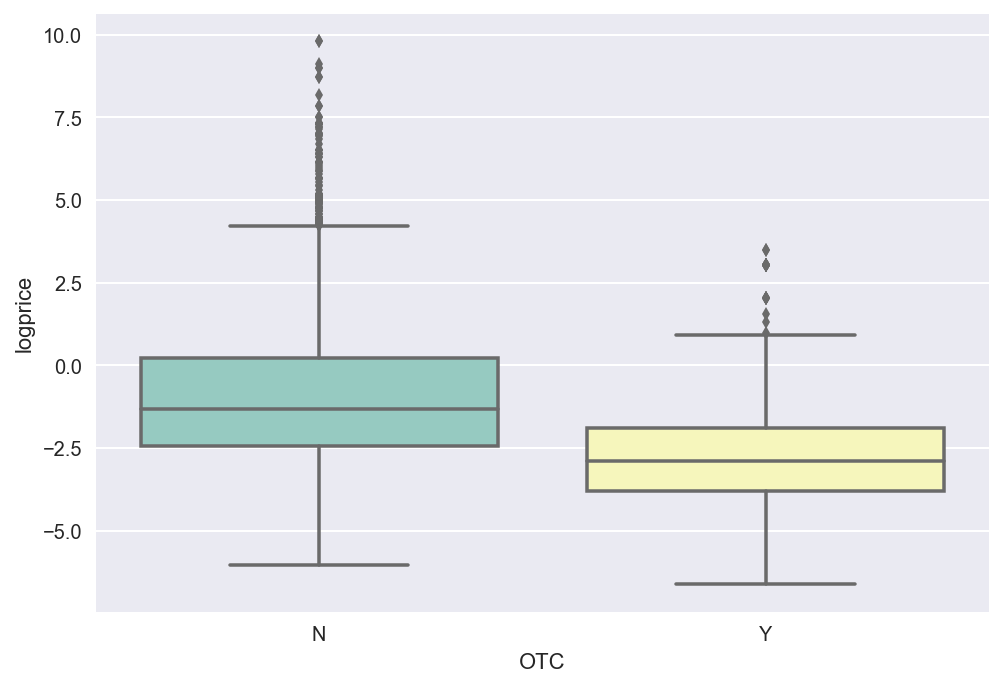

In [32]:
sns.boxplot(x='OTC', 
            y= ('logprice'), 
            data=drug, 
            palette='Set3')    # only one 3.0 data


In [33]:
drug['DOSAGEFORMNAME'].value_counts()  # language column is categorical

TABLET                                            4583
TABLET, FILM COATED                               2722
CAPSULE                                           1089
TABLET, EXTENDED RELEASE                           536
SOLUTION                                           365
CAPSULE, EXTENDED RELEASE                          345
TABLET, FILM COATED, EXTENDED RELEASE              322
CREAM                                              255
CAPSULE, DELAYED RELEASE                           214
KIT                                                200
TABLET, COATED                                     194
SOLUTION/ DROPS                                    165
TABLET, DELAYED RELEASE                            159
TABLET, ORALLY DISINTEGRATING                      154
OINTMENT                                           150
SUSPENSION                                         149
LIQUID                                             145
TABLET, CHEWABLE                                   140
POWDER, FO

In [34]:
drug.loc[drug['STARTMARKETINGDATE']<19700000,:]

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,logprice,price
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,0009307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878
194,11980-022_64d32a4e-ad4b-413a-a775-41e8c854bfc5,11980-022,11980-022-05,"1 BOTTLE, DROPPER in 1 CARTON (11980-022-05) ...",HUMAN PRESCRIPTION DRUG,BLEPHAMIDE,NaN,sulfacetamide sodium and prednisolone acetate,SUSPENSION/ DROPS,OPHTHALMIC,19611001.0,NaN,NDA,NDA012813,"Allergan, Inc.",SULFACETAMIDE SODIUM; PREDNISOLONE ACETATE,100; 2,mg/mL; mg/mL,"Sulfonamide Antibacterial [EPC],Sulfonamides [...",NaN,1198002205,BLEPHAMIDE EYE DROPS,11980002205,24.35083,01/01/2017,ML,C/I,N,"4, 5",B,NaN,NaN,06/07/2017,3.192566,24.35083
195,11980-022_64d32a4e-ad4b-413a-a775-41e8c854bfc5,11980-022,11980-022-10,"1 BOTTLE, DROPPER in 1 CARTON (11980-022-10) ...",HUMAN PRESCRIPTION DRUG,BLEPHAMIDE,NaN,sulfacetamide sodium and prednisolone acetate,SUSPENSION/ DROPS,OPHTHALMIC,19611001.0,NaN,NDA,NDA012813,"Allergan, Inc.",SULFACETAMIDE SODIUM; PREDNISOLONE ACETATE,100; 2,mg/mL; mg/mL,"Sulfonamide Antibacterial [EPC],Sulfonamides [...",NaN,1198002210,BLEPHAMIDE EYE DROPS,11980002210,24.51189,01/01/2017,ML,C/I,N,"4, 5",B,NaN,NaN,06/07/2017,3.199158,24.51189
1947,25010-215_a66cb5df-2c91-458c-af12-c1ba285198f0,25010-215,25010-215-15,100 TABLET in 1 BOTTLE (25010-215-15),HUMAN PRESCRIPTION DRUG,EDECRIN,NaN,ethacrynic acid,TABLET,ORAL,19670110.0,NaN,NDA,NDA016092,"Aton Pharma, Inc.",ETHACRYNIC ACID,25,mg/1,"Increased Diuresis at Loop of Henle [PE],Loop ...",NaN,2501021515,EDECRIN 25 MG TABLET,25010021515,21.72312,05/18/2016,EA,C/I,N,4,B,NaN,NaN,06/07/2017,3.078377,21.72312
2174,30698-060_82414c57-bd5a-41b4-965d-873397b2a7a6,30698-060,30698-060-01,100 TABLET in 1 BOTTLE (30698-060-01),HUMAN PRESCRIPTION DRUG,Lasix,NaN,FUROSEMIDE,TABLET,ORAL,19660701.0,NaN,NDA,NDA016273,Validus Pharmaceuticals LLC,FUROSEMIDE,40,mg/1,"Increased Diuresis at Loop of Henle [PE],Loop ...",NaN,3069806001,LASIX 40 MG TABLET,30698006001,0.88052,03/08/2017,EA,C/I,N,2,B,0.01907,05/17/2017 12:00:00 AM,06/07/2017,-0.127243,0.88052
3433,43538-940_0a6f9938-b6e6-4d4e-a461-f692a78daabe,43538-940,43538-940-60,1 TUBE in 1 CARTON (43538-940-60) > 60 g in 1...,HUMAN PRESCRIPTION DRUG,Neo-Synalar,NaN,neomycin sulfate and fluocinolone acetonide,CREAM,TOPICAL,19630611.0,NaN,ANDA,ANDA060700,Medimetriks Pharmaceuticals,NEOMYCIN SULFATE; FLUOCINOLONE ACETONIDE,3.5; .25,mg/g; mg/g,"Aminoglycoside Antibacterial [EPC],Aminoglycos...",NaN,4353894060,NEO-SYNALAR 0.5%-0.025% CREAM,4353

In [37]:
drug.to_csv('drug.csv',index=0)

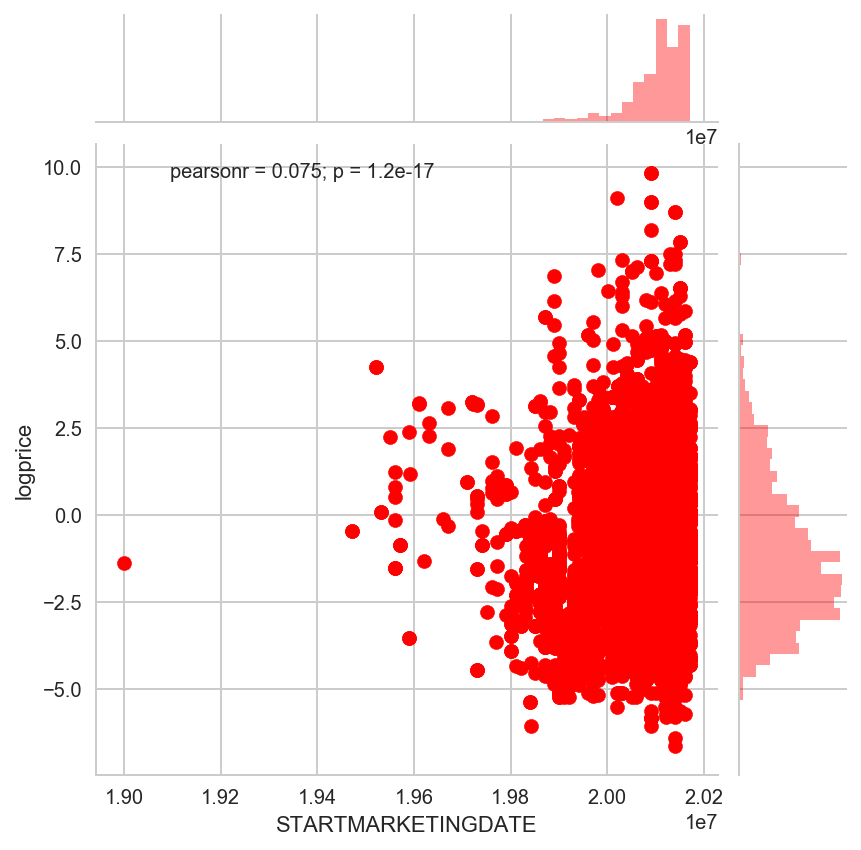

In [23]:
sns.set_style("whitegrid")
sns.jointplot(drug['STARTMARKETINGDATE'], drug['logprice'],color='r')

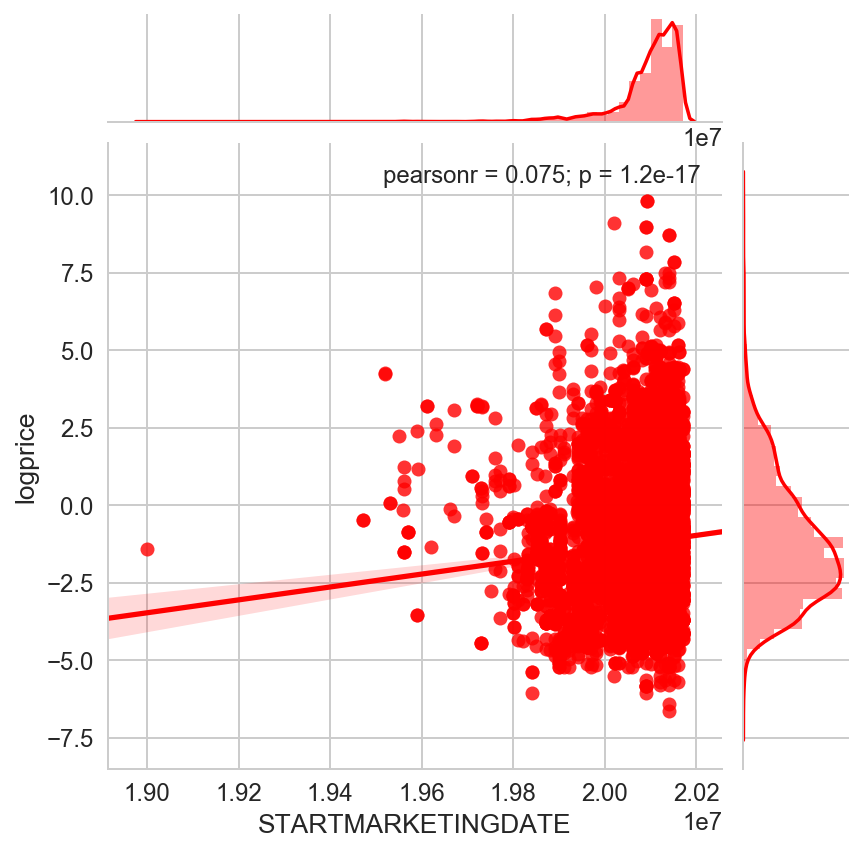

In [377]:
sns.set_style("whitegrid")
sns.jointplot(x="STARTMARKETINGDATE", y="logprice", data=drug, kind="reg",color='r');

(19400000.0, 20245338.86584105)

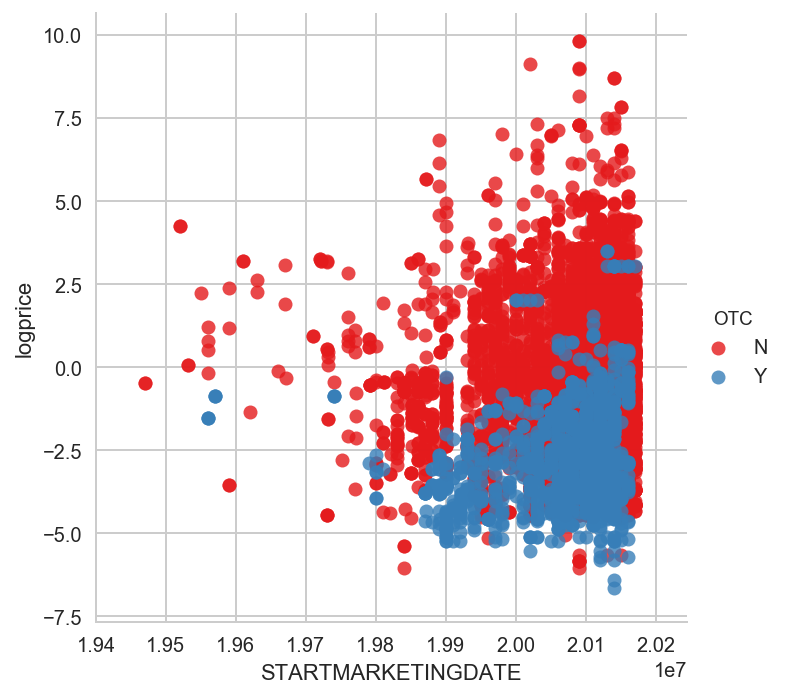

In [40]:
sns.lmplot("STARTMARKETINGDATE", "logprice",drug, hue="OTC", palette="Set1",fit_reg=False)
plt.xlim(1.94e7,)

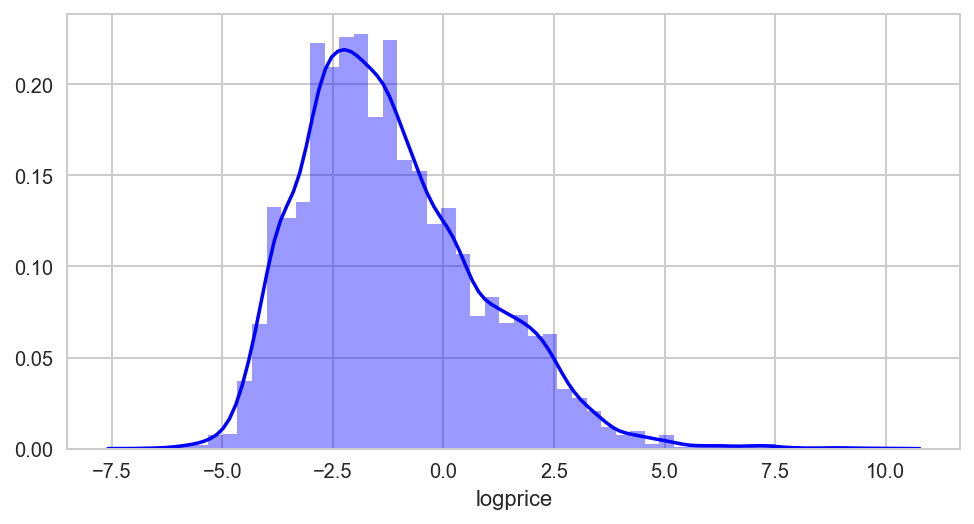

In [41]:
plt.rcParams['figure.figsize']=(8,4)
sns.distplot(drug.logprice,color='blue')

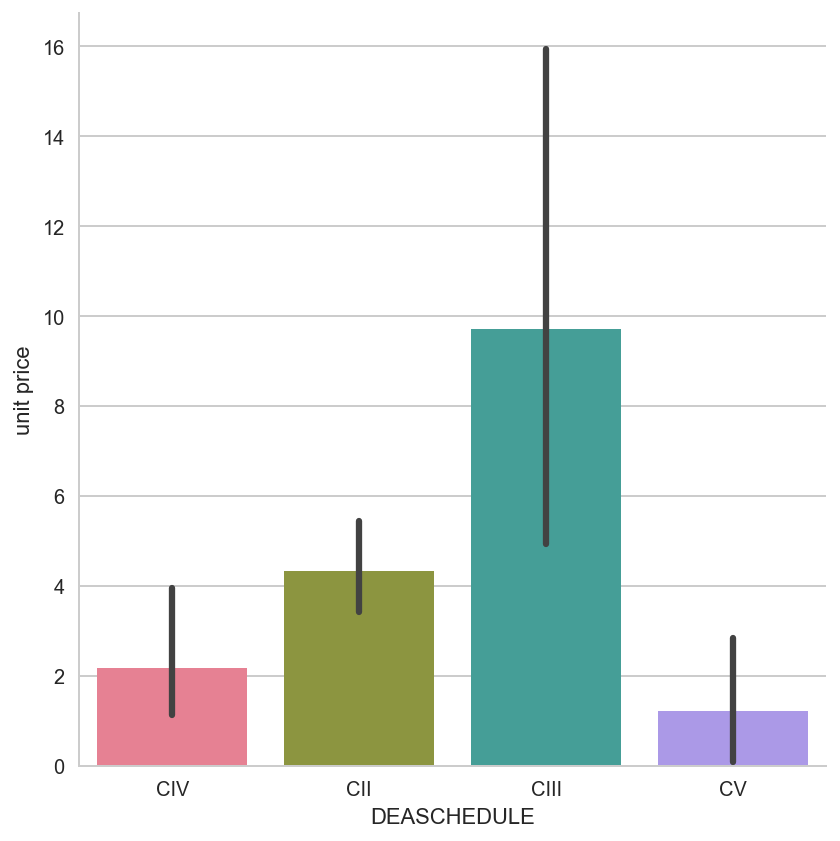

In [42]:
# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="DEASCHEDULE", y="price", data=drug,
                   size=6, kind="bar", palette="husl")    #, hue="sex",
#g.despine(left=True)
g.set_ylabels("unit price")

In [293]:
pricenew.describe()
drug.describe()

,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit
count,24486.000000,1193.000000
mean,9.456078,4.172097
std,209.665558,18.862394
min,0.001320,0.002950
25%,0.077910,0.140910
50%,0.263820,0.440850
75%,1.280190,2.933670
max,18280.916500,375.806250


,STARTMARKETINGDATE,ENDMARKETINGDATE,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit,logprice,price
count,1.310200e+04,2.400000e+02,13102.000000,356.000000,13102.000000,13102.000000
mean,2.009666e+07,2.018056e+07,11.606463,4.402165,-1.188063,11.606463
std,7.176009e+04,2.460232e+04,278.146418,14.378375,2.003364,278.146418
min,1.900011e+07,2.017063e+07,0.001320,0.002950,-6.630124,0.001320
25%,2.007123e+07,2.017113e+07,0.069040,0.261080,-2.673069,0.069040
50%,2.011122e+07,2.018043e+07,0.224790,0.932295,-1.492589,0.224790
75%,2.014093e+07,2.018093e+07,1.024710,3.692120,0.024410,1.024710
max,2.017053e+07,2.054123e+07,18280.916500,145.562330,9.813613,18280.916500


In [303]:
drug.loc[drug['price']>10].shape

(783, 35)

In [304]:
pricenew.loc[pricenew['NADAC_Per_Unit']>10].shape

(1712, 12)

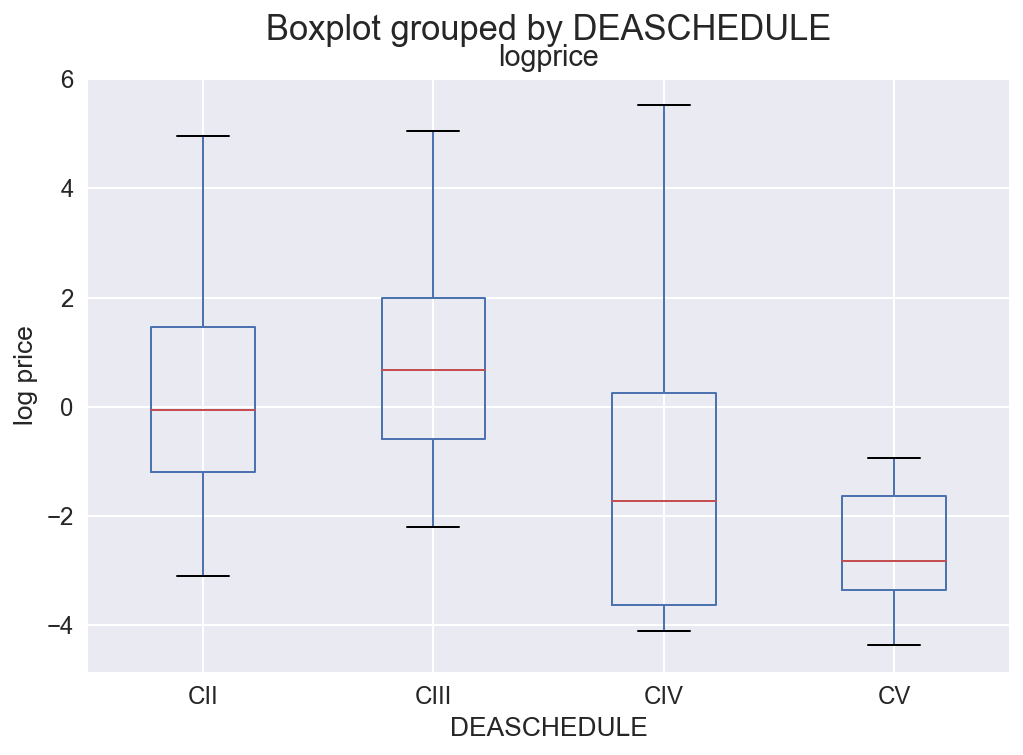

In [358]:
sns.set(font_scale=1.2)
DEA= drug[['DEASCHEDULE', 'logprice']]
#plt.boxplot(x="DEASCHEDULE", y="logprice", data=drug)
DEA.boxplot(by='DEASCHEDULE', column='logprice')
plt.ylabel('log price')

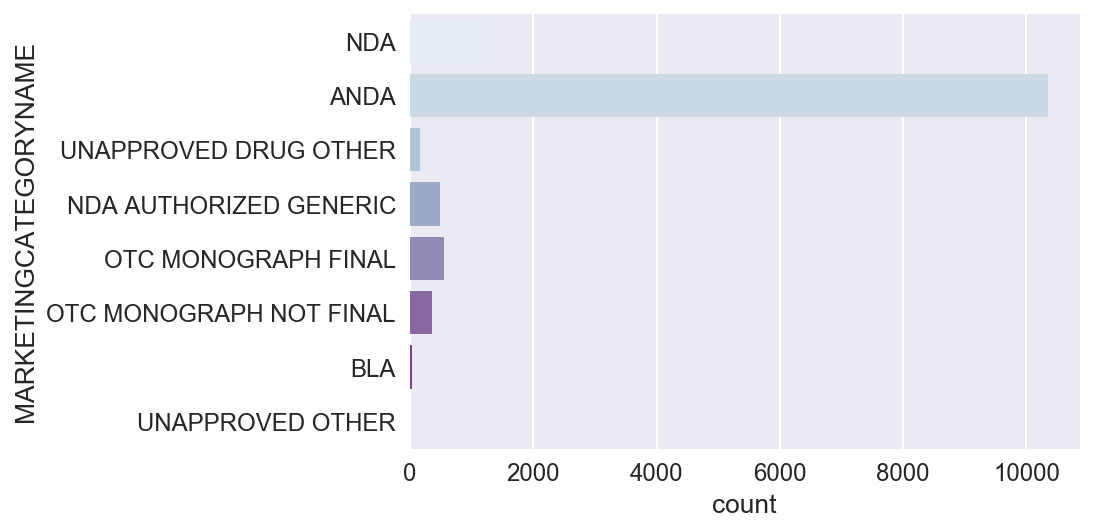

In [372]:
sns.countplot(y="MARKETINGCATEGORYNAME", data=drug,
                   palette="BuPu")

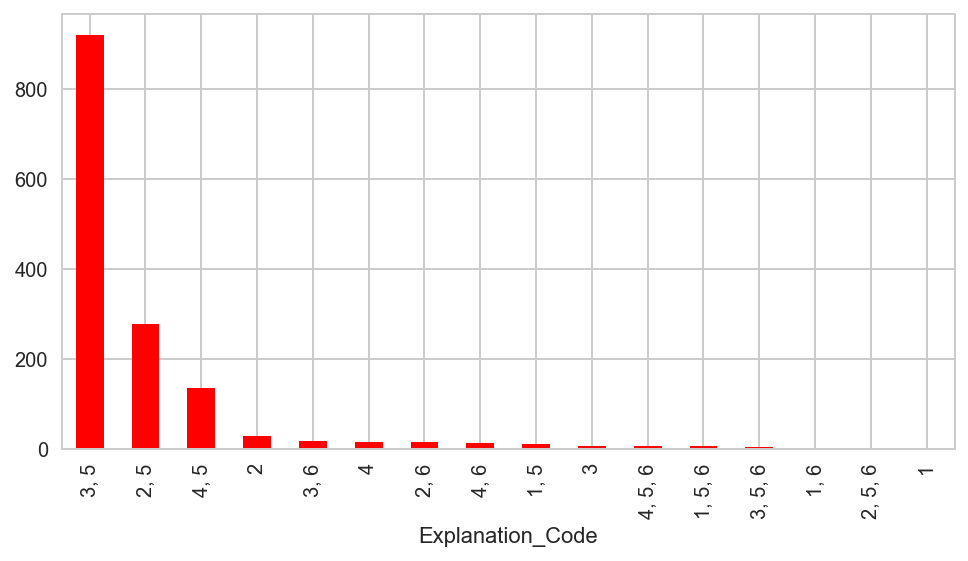

In [43]:
drug.groupby('Explanation_Code')['NADAC_Per_Unit'].mean().sort_values(ascending=False).plot.bar(color='r') # by median

(19400000.0, 20245424.340622999)

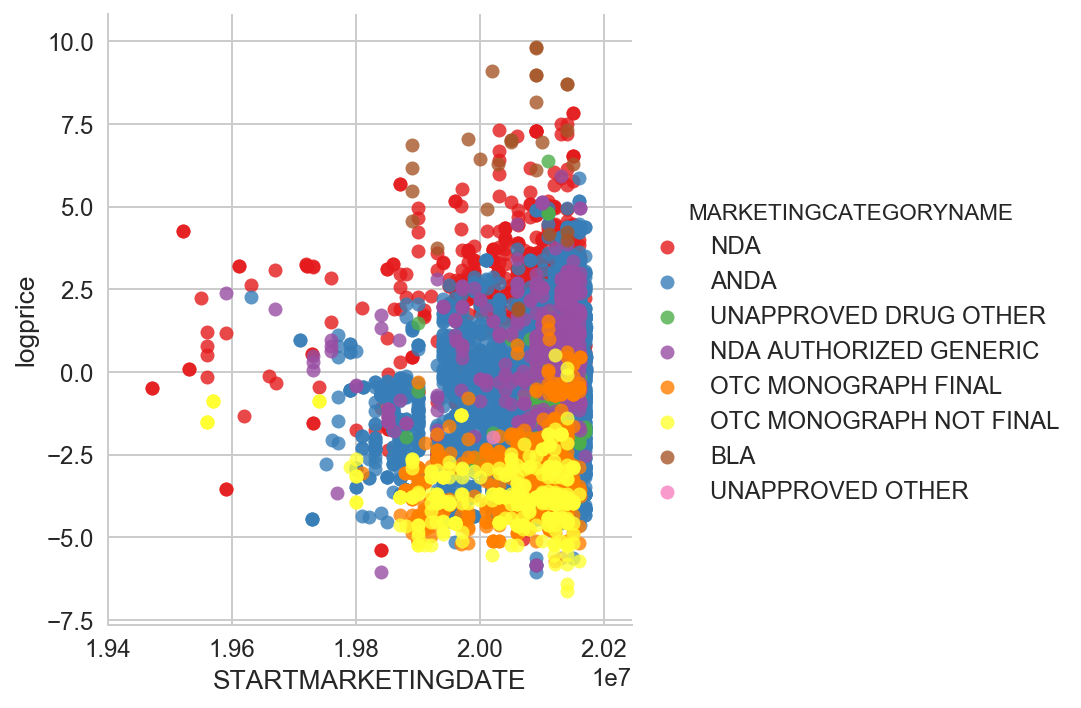

In [396]:
sns.lmplot("STARTMARKETINGDATE", "logprice",drug, hue="MARKETINGCATEGORYNAME", palette="Set1",fit_reg=False)
plt.xlim(1.94e7,)

## Linear regression model

In [7]:
drug=pd.read_csv('drug.csv')
drug.head(2)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,logprice,price
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878
1,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878


In [2]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
#from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
from sklearn import linear_model
ols = linear_model.LinearRegression()       # build the ol the model


# Also valid Python syntax:
# from sklearn.linear_model import LinearRegression
# ols = LinearRegression()     # easy to use but hard for name if we write other functions called linearegression

In [4]:
# key features
keyfeatures=(['PACKAGEDESCRIPTION','PRODUCTTYPENAME','DOSAGEFORMNAME','ROUTENAME','STARTMARKETINGDATE','MARKETINGCATEGORYNAME',
            'PHARM_CLASSES','DEASCHEDULE','OTC','Explanation_Code','Classification_for_Rate_Setting','logprice','price'])



#PRODUCTTYPENAME and OTC redundant using otc instead
#MARKETINGCATEGORYNAME and Classification_for_Rate_Setting redundant using MARKETINGCATEGORYNAME

In [46]:
druglin=drug.loc[:,keyfeatures]

In [47]:
druglin.head()
druglin.shape
druglin.to_csv('druglin.csv',index=0)

,PACKAGEDESCRIPTION,PRODUCTTYPENAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,MARKETINGCATEGORYNAME,PHARM_CLASSES,DEASCHEDULE,OTC,Explanation_Code,Classification_for_Rate_Setting,logprice,price
0,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NDA,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,N,1,G,-3.548075,0.02878
1,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,19590528.0,NDA,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,N,1,G,-3.548075,0.02878
2,1 BOTTLE in 1 CARTON (0009-3116-01) > 30 mL i...,HUMAN PRESCRIPTION DRUG,SOLUTION,TOPICAL,19800620.0,NDA,"Decreased Sebaceous Gland Activity [PE],Lincos...",NaN,N,1,G,-1.748125,0.17410
3,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,HUMAN PRESCRIPTION DRUG,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20030101.0,NDA,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,N,"2, 5",B,3.015722,20.40381
4,10 POUCH in 1 BOX (10019-553-01) > 1 PATCH in...,HUMAN PRESCRIPTION DRUG,"PATCH, EXTENDED RELEASE",TRANSDERMAL,20161201.0,NDA,"Anticholinergic [EPC],Cholinergic Antagonists ...",NaN,N,"2, 5",B,3.015722,20.40381


(13102, 13)

In [400]:
#df = druglin.copy()  
#df.shape

(13102, 13)

In [26]:
# only using columns from FDA
#['Explanation_Code']+['OTC']+['Classification_for_Rate_Setting']+
df=drug.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']]
df.shape
df.describe()

(13102, 8)

,STARTMARKETINGDATE,logprice
count,1.310200e+04,13102.000000
mean,2.009666e+07,-1.188063
std,7.176009e+04,2.003364
min,1.900011e+07,-6.630124
25%,2.007123e+07,-2.673069
50%,2.011122e+07,-1.492589
75%,2.014093e+07,0.024410
max,2.017053e+07,9.813613


In [27]:
# impute the extrem number to mean
df1=df
df1.loc[df1['STARTMARKETINGDATE']< 1.92e7,'STARTMARKETINGDATE']=2.009666e+07

In [28]:
df.head(2)
df=df1

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE,logprice
0,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075
1,"INJECTION, SUSPENSION",INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; S...,Pharmacia and Upjohn Company LLC,19590528.0,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NDA,NaN,-3.548075


In [29]:
df.describe()

,STARTMARKETINGDATE,logprice
count,1.310200e+04,13102.000000
mean,2.009674e+07,-1.188063
std,7.111767e+04,2.003364
min,1.947073e+07,-6.630124
25%,2.007123e+07,-2.673069
50%,2.011122e+07,-1.492589
75%,2.014093e+07,0.024410
max,2.017053e+07,9.813613


In [30]:
df.to_csv('druglmregFDA.csv',index=0)

In [31]:
def Dummify(column):
    column_values = pd.get_dummies(df[column], prefix=column, prefix_sep='__')
    return pd.concat([df.drop(column,axis=1),column_values],axis=1)

df = Dummify('DOSAGEFORMNAME')
df = Dummify('ROUTENAME')
#df.head(2)
df = Dummify('MARKETINGCATEGORYNAME')
#df.head(2)
df = Dummify('PHARM_CLASSES')
#df.head(2)
df = Dummify('DEASCHEDULE')
df=Dummify('LABELERNAME')
#df=Dummify('Classification_for_Rate_Setting')
#df=Dummify('OTC')
#df=Dummify('Explanation_Code')
df.head(2)


#### Isolate the RAD column and dummify it into a data frame with columns RAD__1.0,...., RAD__24.0
#### drop the RAD__1.0 column before concatenating with df (the original RAD has to be dropped, too)
#### use head to print the top 5 lines, as is shown below
#### Your code here
#pd.get_dummies?
# rad = pd.get_dummies(df['RAD'], prefix='RAD', prefix_sep='__')  # become a serise, it;s better to put a prefix
# rad = rad.drop('RAD__1.0', axis=1)   # jot the original column
# rad.head()
# df = pd.concat([df.drop('RAD', axis=1), rad], axis=1)
# df.head()

,STARTMARKETINGDATE,logprice,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, POWDER","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CONCENTRATE,DOSAGEFORMNAME__CREAM,"DOSAGEFORMNAME__CREAM, AUGMENTED",DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,DOSAGEFORMNAME__FILM,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SOLUTION,DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,"DOSAGEFORMNAME__GEL, DENTIFRICE",DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SOLUTION","DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LIQUID,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__PELLET,DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__RINSE,DOSAGEFORMNAME__SHAMPOO,"DOSAGEFORMNAME__SHAMPOO, SUSPENSION",DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING / DROPS","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SWAB,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, COATED","DOSAGEFORMNAME__TABLET, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FILM COATED","DOSAGEFORMNAME__TABLET, FILM COATED, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FOR SUSPENSION","DOSAGEFORMNAME__TABLET, MULTILAYER","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",DOSAGEFORMNAME__TINCTURE,ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__ENTERAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__OPHTHALMIC; TOPICAL,ROUTENAME__ORAL,ROUTENAME__ORAL; ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; SUBLINGUAL,ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__PERINEURAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETING

In [32]:
df.shape
df.head(1)

(13102, 1140)

,STARTMARKETINGDATE,logprice,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, POWDER","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CONCENTRATE,DOSAGEFORMNAME__CREAM,"DOSAGEFORMNAME__CREAM, AUGMENTED",DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,DOSAGEFORMNAME__FILM,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SOLUTION,DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,"DOSAGEFORMNAME__GEL, DENTIFRICE",DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SOLUTION","DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LIQUID,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__PELLET,DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__RINSE,DOSAGEFORMNAME__SHAMPOO,"DOSAGEFORMNAME__SHAMPOO, SUSPENSION",DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING / DROPS","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SWAB,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, COATED","DOSAGEFORMNAME__TABLET, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FILM COATED","DOSAGEFORMNAME__TABLET, FILM COATED, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FOR SUSPENSION","DOSAGEFORMNAME__TABLET, MULTILAYER","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",DOSAGEFORMNAME__TINCTURE,ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__ENTERAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__OPHTHALMIC; TOPICAL,ROUTENAME__ORAL,ROUTENAME__ORAL; ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; SUBLINGUAL,ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__PERINEURAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETING

In [78]:
pd.DataFrame(df.columns, columns=['Column_Name'])

,Column_Name
0,STARTMARKETINGDATE
1,logprice
2,ROUTENAME__AURICULAR (OTIC)
3,ROUTENAME__BUCCAL
4,ROUTENAME__BUCCAL; SUBLINGUAL
5,ROUTENAME__CUTANEOUS
6,ROUTENAME__DENTAL
7,ROUTENAME__ENTERAL
8,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTR...
9,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTR...


In [ ]:
countMembers = []
for e in range(2,len(priceInfo.columns)):
    x =  priceInfo.loc[priceInfo[priceInfo.columns[e]]==1]
    countMembers.append(x['NADAC_Per_Unit'].count())
countMembers

In [33]:
y = df["logprice"]
x = df.loc[:, df.columns != 'logprice']

regression = ols.fit(x, y)

In [34]:
print("R^2 for train set: %f" %ols.score(x, y))

print('-'*50)

#print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.797982
--------------------------------------------------


In [ ]:
colnames = x.columns
result = pd.DataFrame(ols.coef_).transpose()  # convert to dataframe, allows to name the columns, RAD is already dummified here
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

In [35]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2 for train set: 0.799144
--------------------------------------------------
R^2 for test  set: 0.752457


In [36]:
#RMSE
#test=df.logprice
pred=ols.predict(X_test)
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, pred))
rms

0.99743022583819163

In [37]:
print("Mean squared root error: %.2f"
      % np.sqrt(((pred - y_test) ** 2).mean()))

print("Absultue average error: %.2f"
      % abs((pred - y_test)).mean())

Mean squared root error: 1.00
Absultue average error: 0.73


/Users/chrislian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning:

invalid value encountered in log



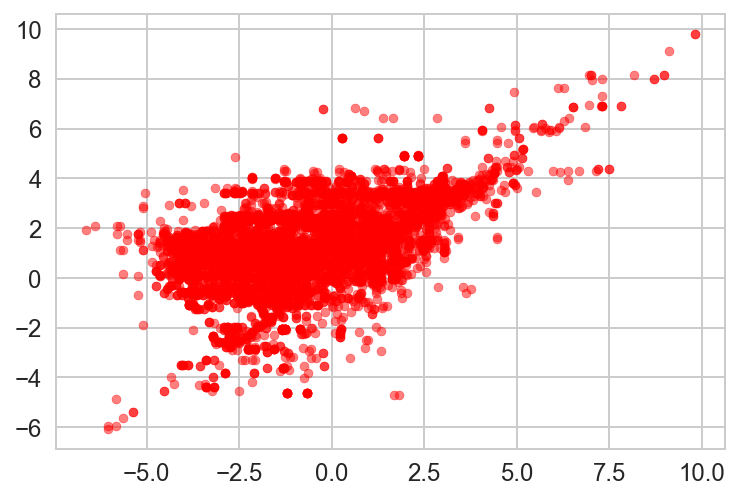

In [480]:
 #Plot outputs  using price as y , result not good
plt.scatter(np.log(df.price),np.log(ols.predict(x)),  color='r',alpha=0.5,s=20)
#plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         #linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

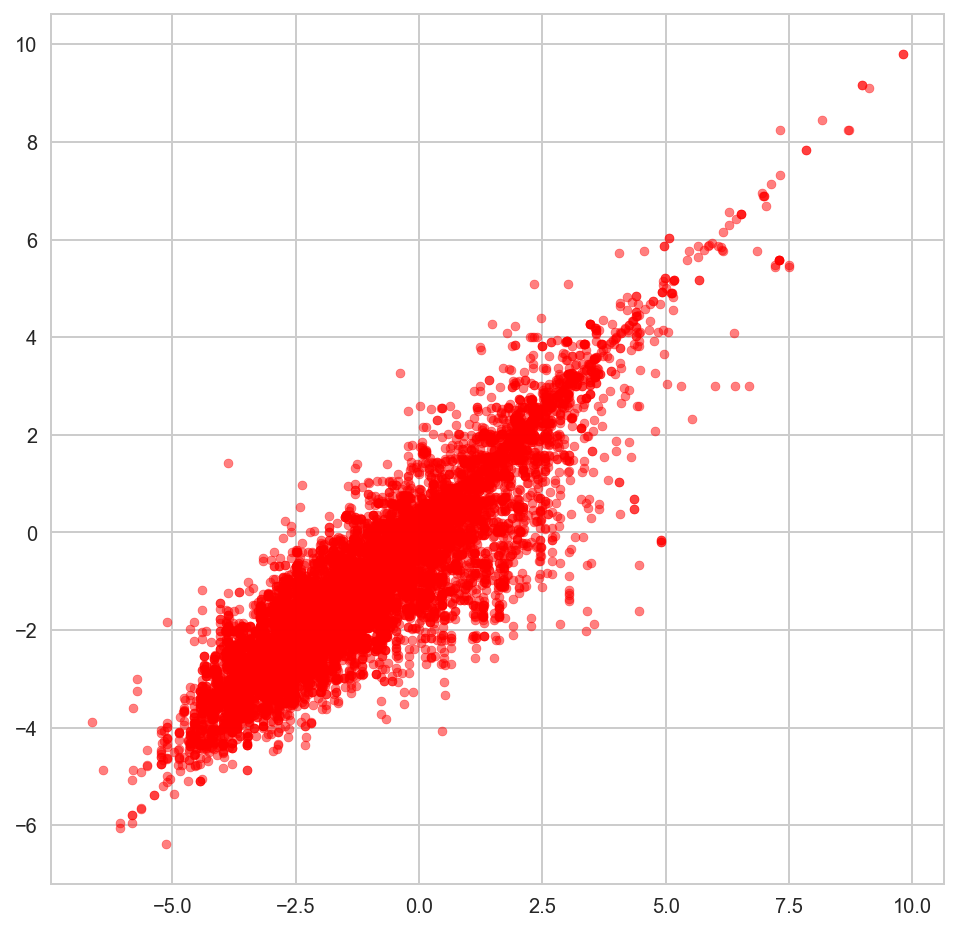

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(df.logprice,ols.predict(x),  color='r',alpha=0.5,s=20)

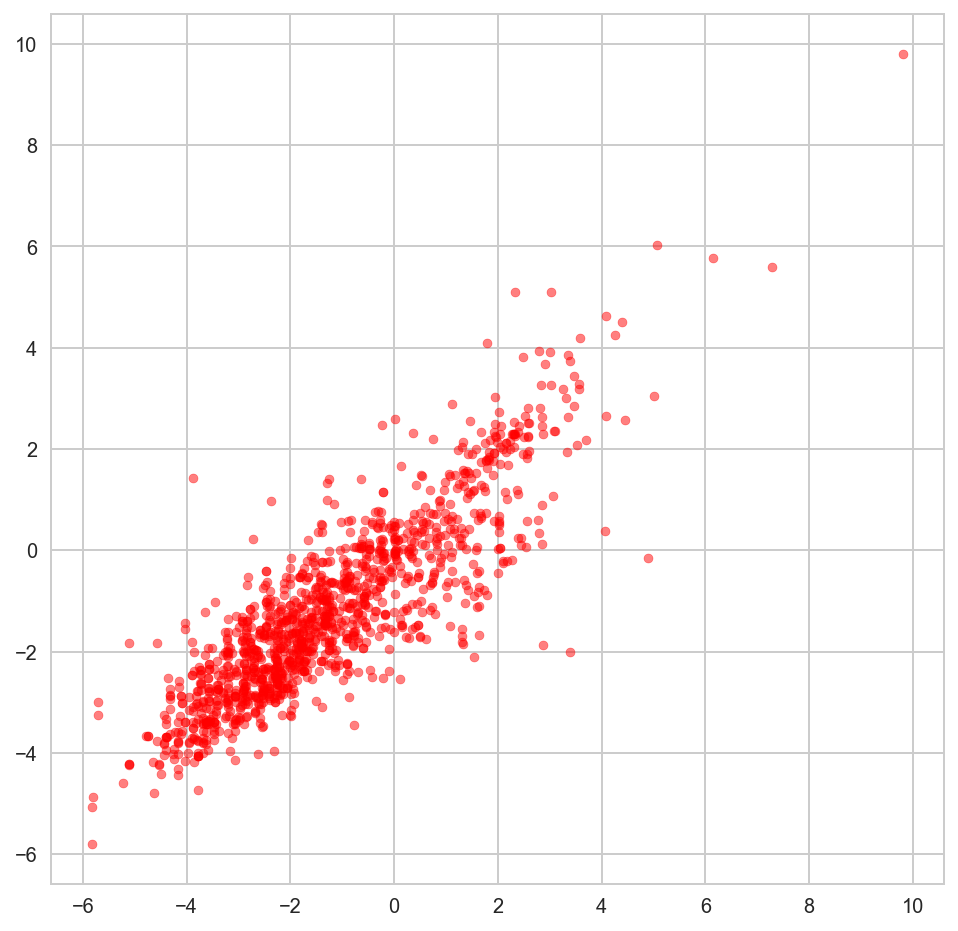

In [39]:
plt.figure(figsize=(8,8))
plt.scatter((y_test),(ols.predict(X_test)),  color='r',alpha=0.5,s=20)

In [85]:
len(ols.predict(x))

13102

In [ ]:
#['DOSAGEFORMNAME'] + ['ROUTENAME'] + ['STARTMARKETINGDATE'] + ['MARKETINGCATEGORYNAME']+ ['LABELERNAME']  + ['PHARM_CLASSES'] + ['DEASCHEDULE'] +['OTC']+['NADAC_Per_Unit']+['Classification_for_Rate_Setting']]

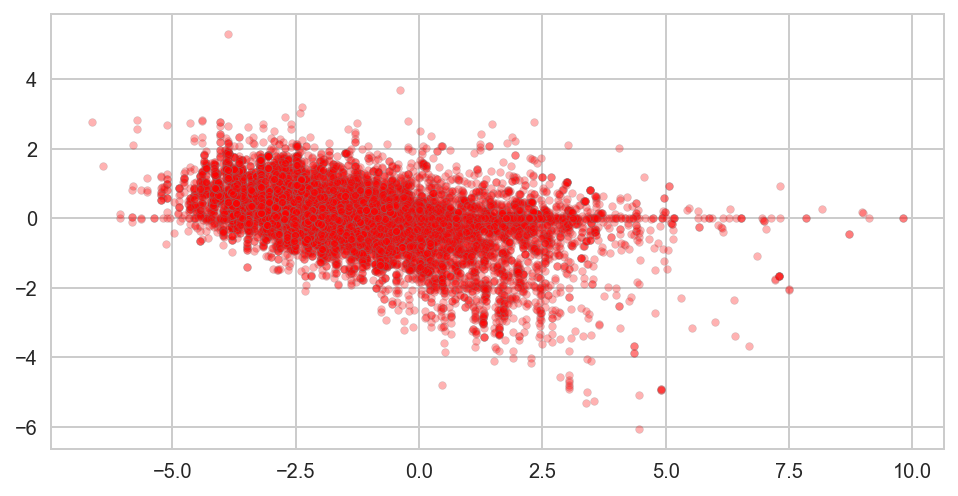

In [147]:
plt.scatter(y,pred-y, color='r',alpha=0.3,s =15, edgecolor='grey')

In [141]:
drug.describe()

,STARTMARKETINGDATE,ENDMARKETINGDATE,NDC11,NADAC_Per_Unit,Corresponding_Generic_Drug_NADAC_Per_Unit,logprice,price
count,1.310200e+04,2.400000e+02,1.310200e+04,13102.000000,356.000000,13102.000000,13102.000000
mean,2.009666e+07,2.018056e+07,5.125268e+10,11.606463,4.402165,-1.188063,11.606463
std,7.176009e+04,2.460232e+04,1.788958e+10,278.146418,14.378375,2.003364,278.146418
min,1.900011e+07,2.017063e+07,9.300730e+07,0.001320,0.002950,-6.630124,0.001320
25%,2.007123e+07,2.017113e+07,4.285800e+10,0.069040,0.261080,-2.673069,0.069040
50%,2.011122e+07,2.018043e+07,5.511104e+10,0.224790,0.932295,-1.492589,0.224790
75%,2.014093e+07,2.018093e+07,6.586206e+10,1.024710,3.692120,0.024410,1.024710
max,2.017053e+07,2.054123e+07,9.920709e+10,18280.916500,145.562330,9.813613,18280.916500


In [41]:
#NOTE WE need to do one more step, in the end using these column to train the whole data set, or cross validationg

## linear regression on huge file


In [45]:
drugall=pd.read_csv('drugall.csv',low_memory=False)

In [46]:
drugall.shape

(1543295, 34)

In [48]:
drugall.loc[:, 'logprice'] = np.log(drugall['NADAC_Per_Unit'])  

In [49]:
dfall=drugall.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']]
dfall.shape
dfall.describe()

(1543295, 8)

,STARTMARKETINGDATE,logprice
count,1.543295e+06,1.543295e+06
mean,2.007744e+07,-1.085115e+00
std,7.726880e+04,2.057907e+00
min,1.900011e+07,-6.630124e+00
25%,2.006100e+07,-2.572296e+00
50%,2.010053e+07,-1.403115e+00
75%,2.012113e+07,1.846439e-01
max,2.017053e+07,9.813613e+00


In [50]:
def Dummify(column):
    column_values = pd.get_dummies(dfall[column], prefix=column, prefix_sep='__')
    return pd.concat([dfall.drop(column,axis=1),column_values],axis=1)

dfall = Dummify('DOSAGEFORMNAME')
dfall = Dummify('ROUTENAME')
#df.head(2)
dfall = Dummify('MARKETINGCATEGORYNAME')
#df.head(2)
dfall = Dummify('PHARM_CLASSES')
#df.head(2)
dfall = Dummify('DEASCHEDULE')
dfall=Dummify('LABELERNAME')
#df=Dummify('Classification_for_Rate_Setting')
#df=Dummify('OTC')
#df=Dummify('Explanation_Code')
dfall.head(2)


,STARTMARKETINGDATE,logprice,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CONCENTRATE,DOSAGEFORMNAME__CREAM,"DOSAGEFORMNAME__CREAM, AUGMENTED",DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,DOSAGEFORMNAME__FILM,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SOLUTION,DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,"DOSAGEFORMNAME__GEL, DENTIFRICE","DOSAGEFORMNAME__GEL, METERED",DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SOLUTION","DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION, CONCENTRATE","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__IRRIGANT,DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LIQUID,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__PELLET,DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__RINSE,DOSAGEFORMNAME__SHAMPOO,"DOSAGEFORMNAME__SHAMPOO, SUSPENSION",DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, COATED","DOSAGEFORMNAME__TABLET, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FILM COATED","DOSAGEFORMNAME__TABLET, FILM COATED, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FOR SUSPENSION","DOSAGEFORMNAME__TABLET, MULTILAYER","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SOLUBLE","DOSAGEFORMNAME__TABLET, SUGAR COATED",ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__INFILTRATION; PERINEURAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE,ROUTENAME__INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; ORAL,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAVESICAL,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__OPHTHALMIC; TOPICAL,ROUTENAME__ORAL,ROUTENAME__ORAL; ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__OROPHARYNGEAL,ROUTENAME__PARENTERAL,ROUTENAME__PERINEURAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SU

In [52]:
y = dfall["logprice"]
x = dfall.loc[:, dfall.columns != 'logprice']

regression = ols.fit(x, y)

In [53]:
print("R^2 for train set: %f" %ols.score(x, y))

print('-'*50)

#print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.805704
--------------------------------------------------


In [54]:
size_ = 300000  # to ask*****************   subtract 7000
X_train, Y_train = x[:-size_],  y[:-size_]
X_val, Y_val = x[-size_:],  y[-size_:]

size_ = 7000  # to ask*****************   subtract 7000
X_train_sub, Y_train_sub = X_train[:-size_],  Y_train[:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

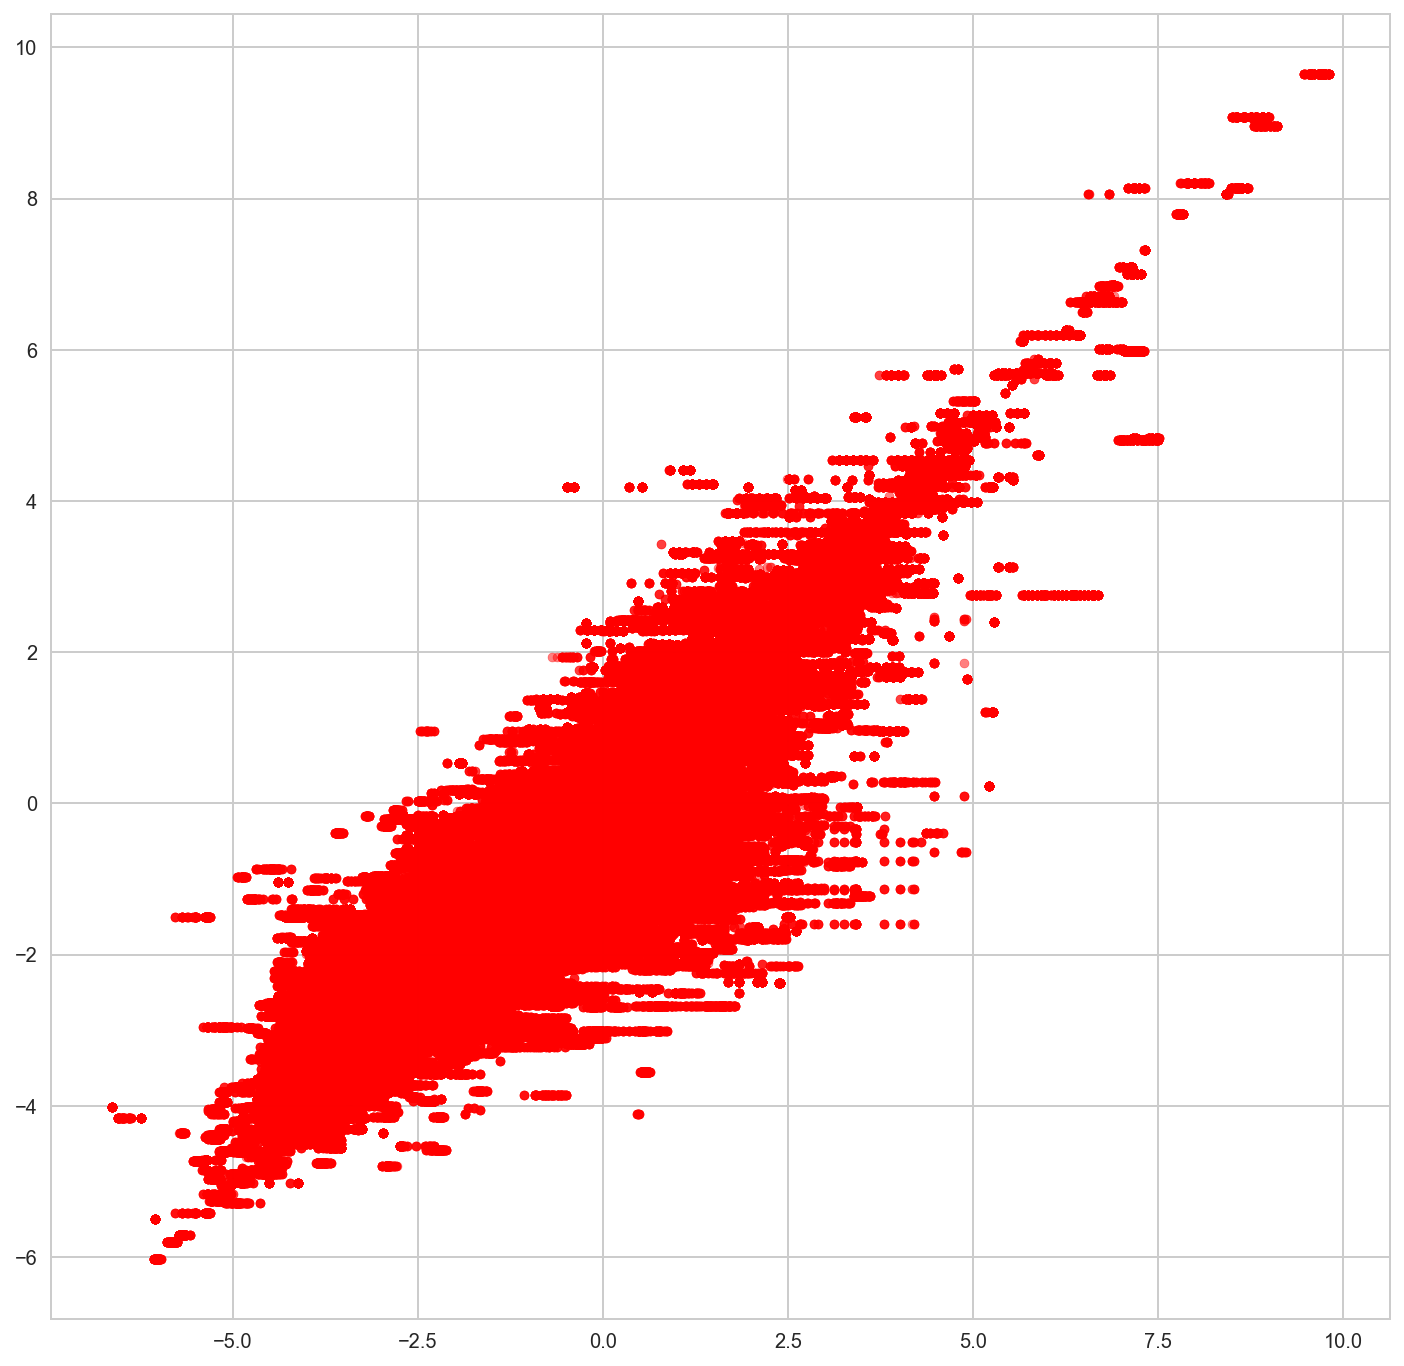

In [56]:
plt.figure(figsize=(12,12))
plt.scatter(dfall.logprice,ols.predict(x),  color='r',alpha=0.5,s=20)

In [ ]:
se 